In [330]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm

In [23]:
economic_df = pd.read_csv('Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv')

In [24]:
economic_df.head()

,Label (Grouping),Category,State,Estimate,Margin of Error,Percent,Percent Margin of Error,Year
0,EMPLOYMENT STATUS,Header,Alabama,NaN,NaN,NaN,NaN,2010
1,Population 16 years and over,EMPLOYMENT STATUS,Alabama,"3,714,504","±1,588","3,714,504",(X),2010
2,In labor force,EMPLOYMENT STATUS,Alabama,"2,246,848","±5,576",60.5%,±0.1,2010
3,Civilian labor force,EMPLOYMENT STATUS,Alabama,"2,230,879","±5,531",60.1%,±0.1,2010
4,Employed,EMPLOYMENT STATUS,Alabama,"2,036,867","±5,904",54.8%,±0.2,2010


In [26]:
economic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98020 entries, 0 to 98019
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Label (Grouping)         98020 non-null  object
 1   Category                 98020 non-null  object
 2   State                    98020 non-null  object
 3   Estimate                 92612 non-null  object
 4   Margin of Error          92612 non-null  object
 5   Percent                  92612 non-null  object
 6   Percent Margin of Error  92612 non-null  object
 7   Year                     98020 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 6.0+ MB


In [27]:
economic_df['Estimate'] = economic_df['Estimate'].replace('(X)','0')
economic_df['Estimate'] = economic_df['Estimate'].str.replace(',', '').astype(float)

economic_df['Percent'] = economic_df['Percent'].replace('(X)','0')
economic_df['Percent'] = economic_df['Percent'].str.replace(',', '').str.replace('%','').astype(float)

economic_df['Margin of Error'] = economic_df['Margin of Error'].replace('(X)','0')
economic_df['Margin of Error'] = economic_df['Margin of Error'].str.replace(',', '').str.replace('±','').astype(float)

economic_df['Percent Margin of Error'] = economic_df['Percent Margin of Error'].replace('(X)','0')
economic_df['Percent Margin of Error'] = economic_df['Percent Margin of Error'].str.replace(',', '').str.replace('±','').astype(float)

In [28]:
economic_df['Category'].unique()

array(['Header', 'EMPLOYMENT STATUS', 'COMMUTING TO WORK', 'OCCUPATION',
       'INDUSTRY', 'CLASS OF WORKER',
       'INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)',
       'HEALTH INSURANCE COVERAGE',
       'PERCENTAGE OF FAMILIES AND PEOPLE WHOSE INCOME IN THE PAST 12 MONTHS IS BELOW THE POVERTY LEVEL',
       'INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2016 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2017 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2015 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2018 INFLATION-ADJUSTED DOLLARS)',
       'INCOME AND BENEFITS (IN 2022 INFLATION-ADJUSTED DOLLARS)',
       'IN

In [29]:
# clean the labels for better formatting (eg. trail white space, :,...)
def clean_labels(x):
    x = x.strip()
    x = x.replace(':', '')
    return x

economic_df['Label (Grouping)'] = economic_df['Label (Grouping)'].apply(clean_labels)

## Handling NA values

In [30]:
economic_df.isna().sum()

Label (Grouping)              0
Category                      0
State                         0
Estimate                   5408
Margin of Error            5408
Percent                    5408
Percent Margin of Error    5408
Year                          0
dtype: int64

In [31]:
economic_df[economic_df['Category']=='Header'].count()

Label (Grouping)           5408
Category                   5408
State                      5408
Estimate                      0
Margin of Error               0
Percent                       0
Percent Margin of Error       0
Year                       5408
dtype: int64

In [32]:
economic_df.dropna(inplace=True)

In [39]:
nan_economic_stat_df = pd.DataFrame(economic_df.groupby(['Category']).apply(lambda x: [(x['Estimate']==0).sum(), 
                                                   (x['Margin of Error']==0).sum(), 
                                                   (x['Percent']==0).sum(),
                                                   (x['Percent Margin of Error']==0).sum()]))

In [43]:
nan_economic_stat_df = nan_economic_stat_df[0].apply(pd.Series)
nan_economic_stat_df.rename(columns={0:'Estimate', 1:'Margin of Error', 2:'Percent', 3:'Percent Margin of Error'})

,Estimate,Margin of Error,Percent,Percent Margin of Error
Category,,,,
CLASS OF WORKER,0,0,0,676
COMMUTING TO WORK,0,0,676,1352
EMPLOYMENT STATUS,676,676,15,3380
HEALTH INSURANCE COVERAGE,2496,2496,2496,6500
INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2011 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2012 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2013 INFLATION-ADJUSTED DOLLARS),0,0,780,936
INCOME AND BENEFITS (IN 2014 INFLATION-ADJUSTED DOLLARS),0,0,780,936


We will handle them individually

## Employment Status

In [62]:
employment_df = economic_df[economic_df['Category']=='EMPLOYMENT STATUS']

In [80]:
list(employment_df['Label (Grouping)'].unique())

['Population 16 years and over',
 'In labor force',
 'Civilian labor force',
 'Employed',
 'Unemployed',
 'Armed Forces',
 'Not in labor force',
 'Percent Unemployed',
 'Females 16 years and over',
 'Own children under 6 years',
 'All parents in family in labor force',
 'Own children 6 to 17 years',
 'Unemployment Rate',
 'Own children of the householder under 6 years',
 'Own children of the householder 6 to 17 years']

In [73]:
# effectively there is no nan value for estimate (since the two grouping are percentages)
employment_df[(employment_df['Estimate']==0)]['Label (Grouping)'].unique()

array(['Percent Unemployed', 'Unemployment Rate'], dtype=object)

In [74]:
# only armed force got no percent data
employment_df[(employment_df['Percent']==0)]['Label (Grouping)'].unique()

array(['Armed Forces'], dtype=object)

### Data Transformations

In [217]:
# Percent Unemployed is effectively the unemployment rate for 2010-2014

employment_df.loc[employment_df['Label (Grouping)'] == 'Percent Unemployed','Label (Grouping)'] = 'Unemployment Rate'

# group them by label, state, year
employment_grouped_df = employment_df.groupby(['Label (Grouping)','State','Year']) \
                        [['Estimate','Percent','Margin of Error','Percent Margin of Error']].mean()

In [345]:
all_states = employment_df.State.unique()

In [213]:
# https://wisevoter.com/state-rankings/beef-production-by-state/
top3_beef_producer = ['Texas','Oklahoma','Missouri']

In [214]:
# unemployed / civilian labor force to get estimated unemployed rate
# unemployment_rate_state_df = (employment_grouped_df.loc[('Unemployed',),:]['Estimate']/ \
#                                 employment_grouped_df.loc[('Civilian labor force',),:]['Estimate'])*100
# 
# average_unemployment_rate = unemployment_rate_state_df.unstack(0).mean(axis=1)

[]

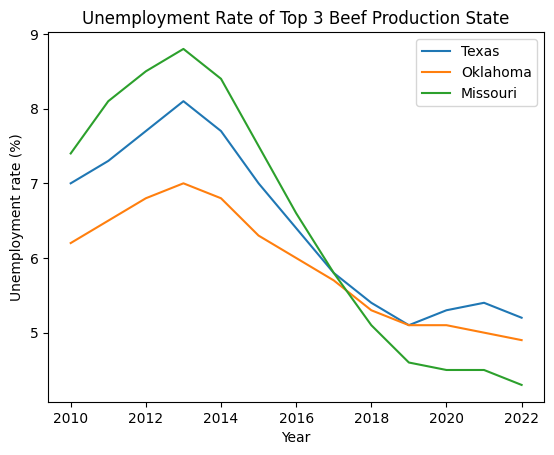

In [936]:
for state in top3_beef_producer:
    employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].plot(label=state)
    plt.legend()

plt.title('Unemployment Rate of Top 3 Beef Production State')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.plot()

In [243]:
# https://www.indexbox.io/search/top-10-pork-producing-states/
top3_pork_producer = ['Iowa', 'North Carolina', 'Minnesota']

[]

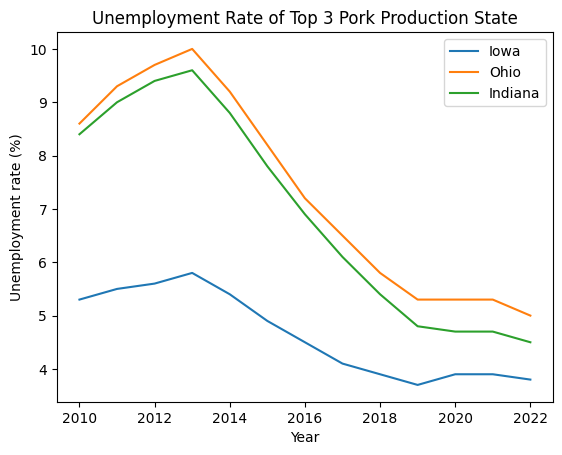

In [938]:
for state in top3_pork_producer:
    employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].plot(label=state)
    plt.legend()

plt.title('Unemployment Rate of Top 3 Pork Production State')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.plot()

In [248]:
top3_chicken_producer = ['Georgia', 'Alabama', 'Arkansas']

[]

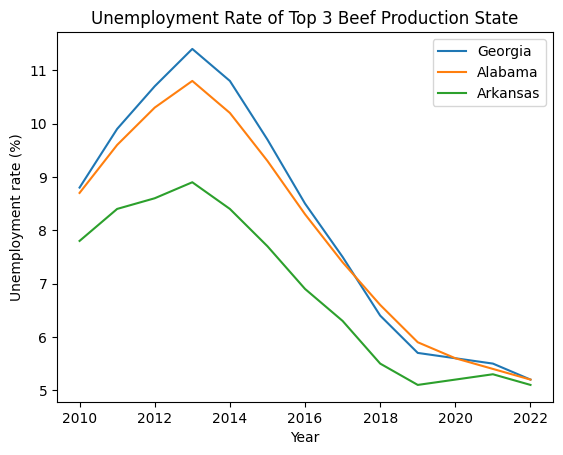

In [939]:
for state in top3_chicken_producer:
    employment_grouped_df.loc[('Unemployment Rate',state),'Percent'].plot(label=state)
    plt.legend()

plt.title('Unemployment Rate of Top 3 Beef Production State')
plt.xlabel('Year')
plt.ylabel('Unemployment rate (%)')
plt.plot()

In [831]:
employment_grouped_df.loc[('Unemployment Rate',),]['Percent']

State    Year
Alabama  2010     8.7
         2011     9.6
         2012    10.3
         2013    10.8
         2014    10.2
                 ... 
Wyoming  2018     4.5
         2019     4.5
         2020     4.4
         2021     4.2
         2022     3.8
Name: Percent, Length: 676, dtype: float64

In [836]:
employment_df.groupby(['Label (Grouping)','State']) \
                        [['Estimate','Percent','Margin of Error','Percent Margin of Error']].mean() \
                        .loc[('Unemployment Rate',),'Percent'].sort_values()

State
North Dakota             3.076923
South Dakota             4.092308
Nebraska                 4.346154
Iowa                     4.638462
Wyoming                  4.676923
Vermont                  5.061538
New Hampshire            5.115385
Utah                     5.161538
Minnesota                5.223077
Kansas                   5.338462
Montana                  5.392308
Wisconsin                5.453846
Hawaii                   5.592308
Virginia                 5.730769
Maine                    5.776923
Oklahoma                 5.900000
Colorado                 6.123077
Idaho                    6.161538
Texas                    6.415385
Missouri                 6.469231
Maryland                 6.492308
Massachusetts            6.746154
Washington               6.853846
Arkansas                 6.861538
Indiana                  6.930769
Delaware                 6.930769
Pennsylvania             6.946154
West Virginia            7.215385
New York                 7.276923
Ohio    

### Regional transformation

In [915]:
# define regions
region_dict = {
    'Mideast':[['Delaware', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee', 'Virginia', 'West Virginia']],
    'Midwest':[['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'Wisconsin']],
    'Mountain_Prairie':[['Colorado', 'Kansas', 'Montana', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']],
    'Northeast':[['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']],
    'Northwest':[['Alaska', 'Idaho', 'Oregon', 'Washington', 'District of Columbia']],
    'Southeast':[['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'Oklahoma', 'Puerto Rico', 'South Carolina', 'Texas']],
    'Southwest':[['Arizona', 'California', 'Hawaii', 'Nevada', 'New Mexico']]
}

state_to_region = {state: region for region, states in region_dict.items() for state in states[0]}

employment_df['Region'] = employment_df['State'].map(state_to_region)

all_regions = employment_df.Region.unique()

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/1634779250.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_df['Region'] = employment_df['State'].map(state_to_region)


In [923]:
regional_UR = employment_df[employment_df['Label (Grouping)']=='Unemployment Rate'].groupby(['Region','Year'])['Percent'].mean()

Text(0.5, 1.0, 'Regional Average Unemployment Rate')

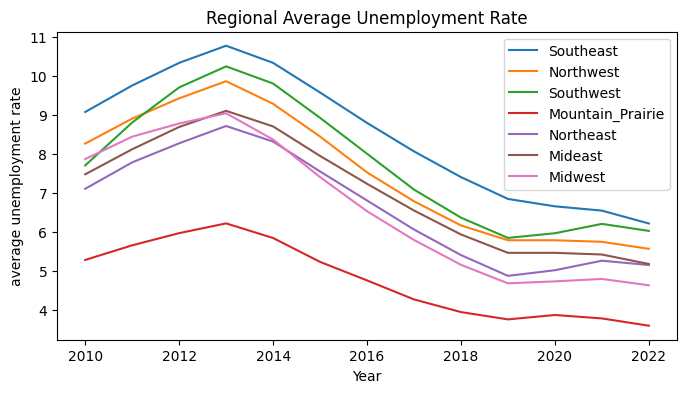

In [925]:
plt.figure(figsize=(8, 4))
for region in all_regions:
    (regional_UR).loc[(region),:].plot(label=region)
    plt.legend()

plt.ylabel('average unemployment rate')
plt.title('Regional Average Unemployment Rate')

# Are there any relationships between meat production and unemployment rate (especially in shortlisted states)

In [441]:
meat_production_df = pd.read_csv("Data/Meat_Stats_Meat_Production.csv", index_col=0)
meat_cold_storage_df = pd.read_csv('Data/Meat_Stats_Cold_Storage.csv')
meat_slaughter_counts_df = pd.read_csv('Data/Meat_Stats_Slaughter_Counts.csv')
meat_slaughter_weights_df = pd.read_csv('Data/Meat_Stats_Slaughter_Weights.csv')

In [442]:
meat_production_df.Animal.unique()

array(['Beef', 'Veal', 'Pork', 'Lamb and Mutton', 'Broilers',
       'Other Chicken', 'Turkey'], dtype=object)

In [443]:
# simpify the grouping

simplied_animal_dict = {
    'Other Chicken': 'Broilers',
    'Turkey': 'Others',
    'Veal': 'Others',
    'Lamb and Mutton': 'Others',
    'Beef': 'Beef',
    'Pork': 'Pork',
    'Broilers': 'Broilers'
}

meat_production_df['Animal'] = meat_production_df['Animal'].map(simplied_animal_dict)

In [444]:
# simple transformation
meat_production_df['Production'] = meat_production_df['Production'].str.replace(',','').apply(float)

# meat_production_df.to_csv('Data/cleaned_meat_production_df.csv')

meat_production_2010_2022 = meat_production_df[(meat_production_df['Year']>=2010) & (meat_production_df['Year']<=2022)]

In [476]:
grouped_animal_df = meat_production_2010_2022.groupby(['Animal','Year'])['Production'].sum()

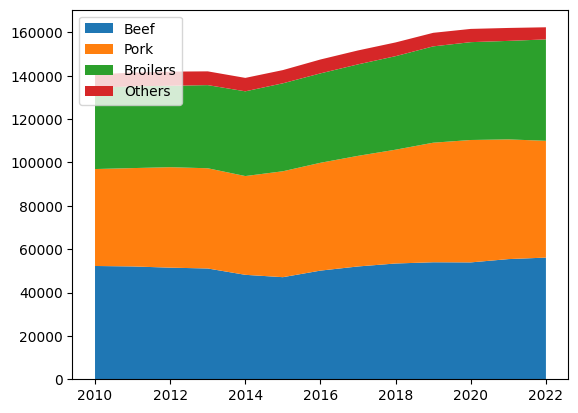

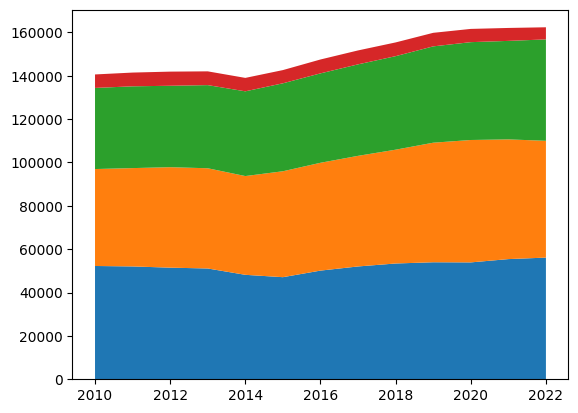

In [446]:
category = ['Beef','Pork','Broilers','Others']

Beef_production = grouped_animal_df.loc['Beef',:].values
Pork_production = grouped_animal_df.loc['Pork',:].values
Broilers_production = grouped_animal_df.loc['Broilers',:].values
Others_production = grouped_animal_df.loc['Others',:].values

x = np.sort(meat_production_2010_2022.Year.unique())
y = np.vstack([Beef_production, Pork_production, Broilers_production, Others_production])

fig, ax = plt.subplots()

ax.stackplot(np.sort(meat_production_2010_2022.Year.unique()),
             Beef_production,
             Pork_production,
             Broilers_production,
             Others_production,
             labels=category,
             )
ax.legend(loc='upper left')

fig, ax = plt.subplots()
ax.stackplot(x, y)


### OLS Regression

In [631]:
OLS_results = {}

In [786]:
# run OLS Regression on all states to see if there are any linear relationship between
# meat production and unemployment rate

total_meat_production_series = grouped_animal_df.unstack(0).sum(axis=1)

def OLS_analysis(meat_production_series, unemployment_df, all_states, experiment_name):
    
    results_list = []
    rsquare = np.zeros((len(all_states),))
    pvalues = np.zeros((len(all_states),))
    fstat = np.zeros((len(all_states),))
    beta = np.zeros((len(all_states),))
    beta_95CI = np.zeros((2, len(all_states)))
    
    # run the OLS regression and store the results
    for n, state in enumerate(all_states):
        model = sm.OLS(unemployment_df.loc[state].values, sm.add_constant(meat_production_series.values))
        results = model.fit()
        results_list.append(results)
        rsquare[n] = results.rsquared
        fstat[n] = results.fvalue
        beta[n] = results.params[1]
        beta_95CI[:,n] = results.conf_int(alpha=0.05)[1,:]
        pvalues[n] = results.pvalues[1]

    OLS_results[experiment_name] = {
            'result_runs': results_list,
            'rsquare': rsquare,
            'pvalues': pvalues,
            'fstat': fstat,
            'beta': beta,
            'beta_95CI': beta_95CI,
    }
    

In [1185]:
def plot_OLS_key_results(experiment_name,all_states, title):
    # function to plot all the key OLS result, take in experiment name and all states as parameter

    fig, axes = plt.subplots(3, 1, figsize=(16,12), sharex=True)
    
    axes[0].bar(np.arange(1,len(all_states)+1,1), OLS_results[experiment_name]['beta'], yerr=(OLS_results[experiment_name]['beta']-OLS_results[experiment_name]['beta_95CI'])[0,:])
    axes[0].set_xticks(range(len(all_states)),all_states, rotation=90, fontsize='small')
    #axes[0,1].set_xlabel('Test Assets')
    axes[0].set_ylabel('Regression Coefficient')
    
    
    axes[1].bar(np.arange(1,len(all_states)+1,1), OLS_results[experiment_name]['rsquare'])
    axes[1].set_xticks(np.arange(1,len(all_states)+1,1))
    axes[1].set_xticklabels(all_states, rotation=90, fontsize='small')
    axes[1].set_ylabel('Rsquare')
    
    axes[2].bar(np.arange(1,len(all_states)+1,1), OLS_results[experiment_name]['fstat'])
    axes[2].set_xticks(np.arange(1,len(all_states)+1,1))
    axes[2].set_xticklabels(all_states, rotation=90, fontsize='small')
    axes[2].set_ylabel('F-Statistic')
    axes[2].set_xlabel('State')

    axes[0].set_title(title)
    
    plt.subplots_adjust(wspace=0.2, hspace=0.0)
    plt.show()

    fig.savefig(f'{experiment_name}.png')

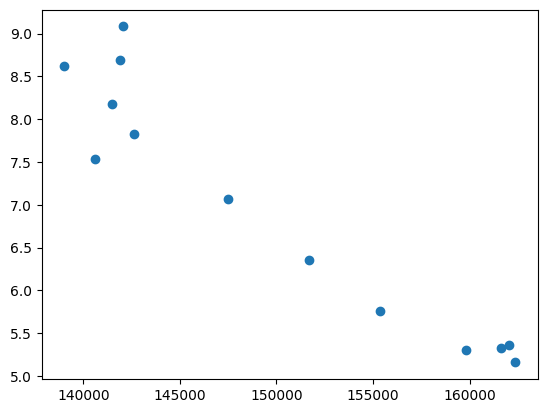

In [788]:
plt.scatter(total_meat_production_series,average_unemployment_rate.values)

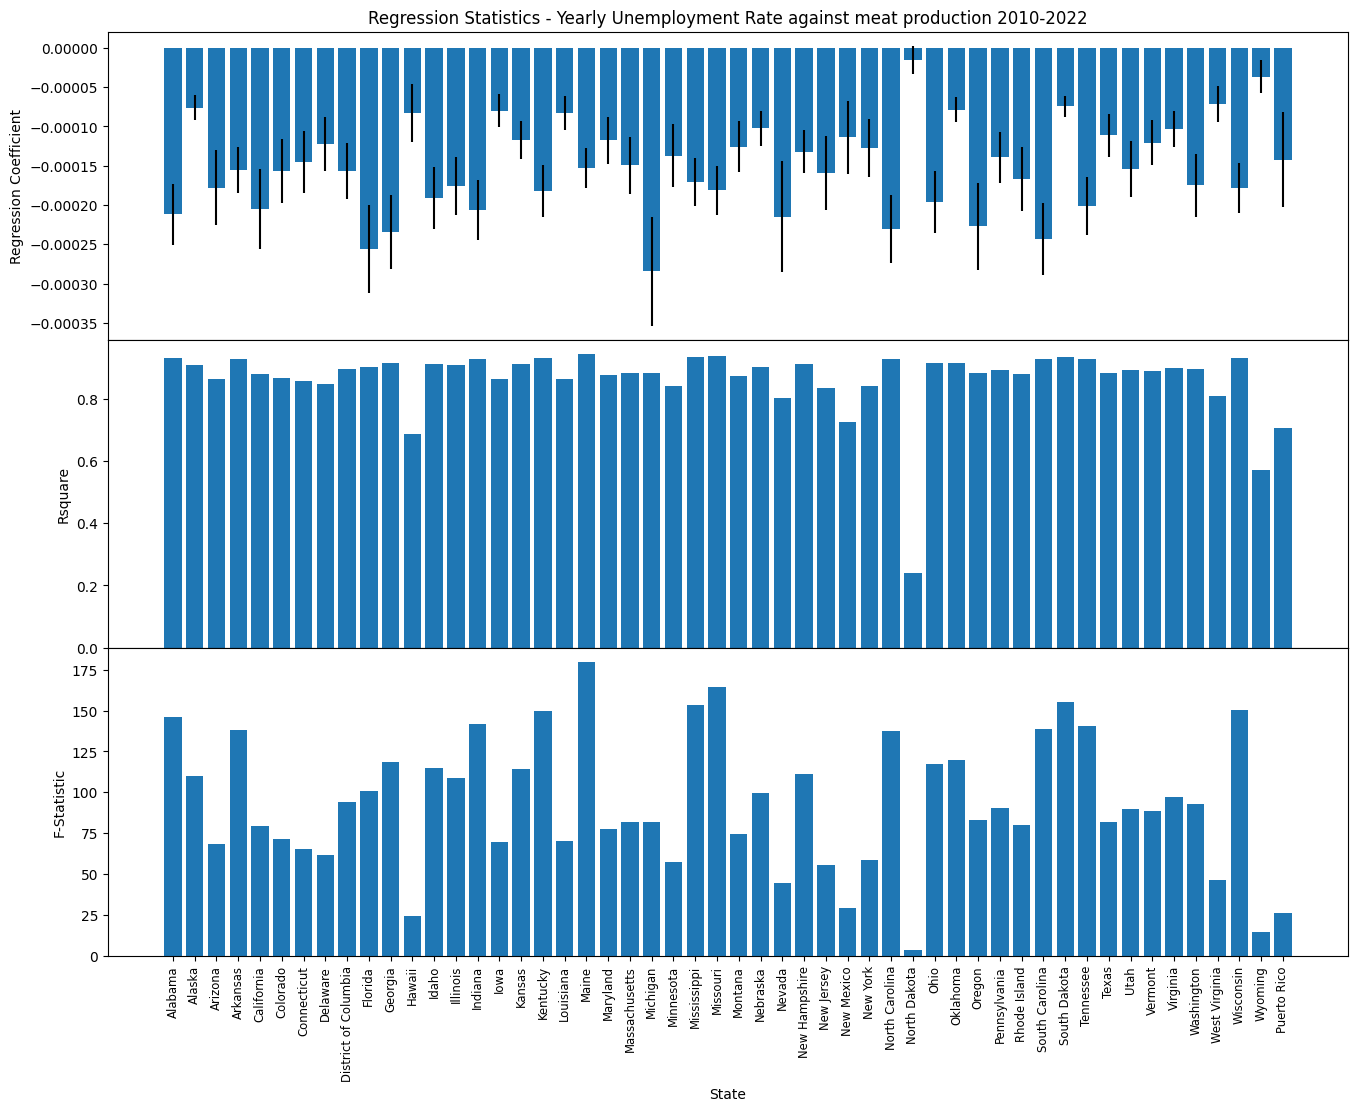

In [1186]:
OLS_analysis(total_meat_production_series, 
             employment_grouped_df.loc[('Unemployment Rate',),'Percent'],
             all_states,
             "Yearly_OLS")

plot_OLS_key_results('Yearly_OLS',all_states, 'Regression Statistics - Yearly Unemployment Rate against meat production 2010-2022')

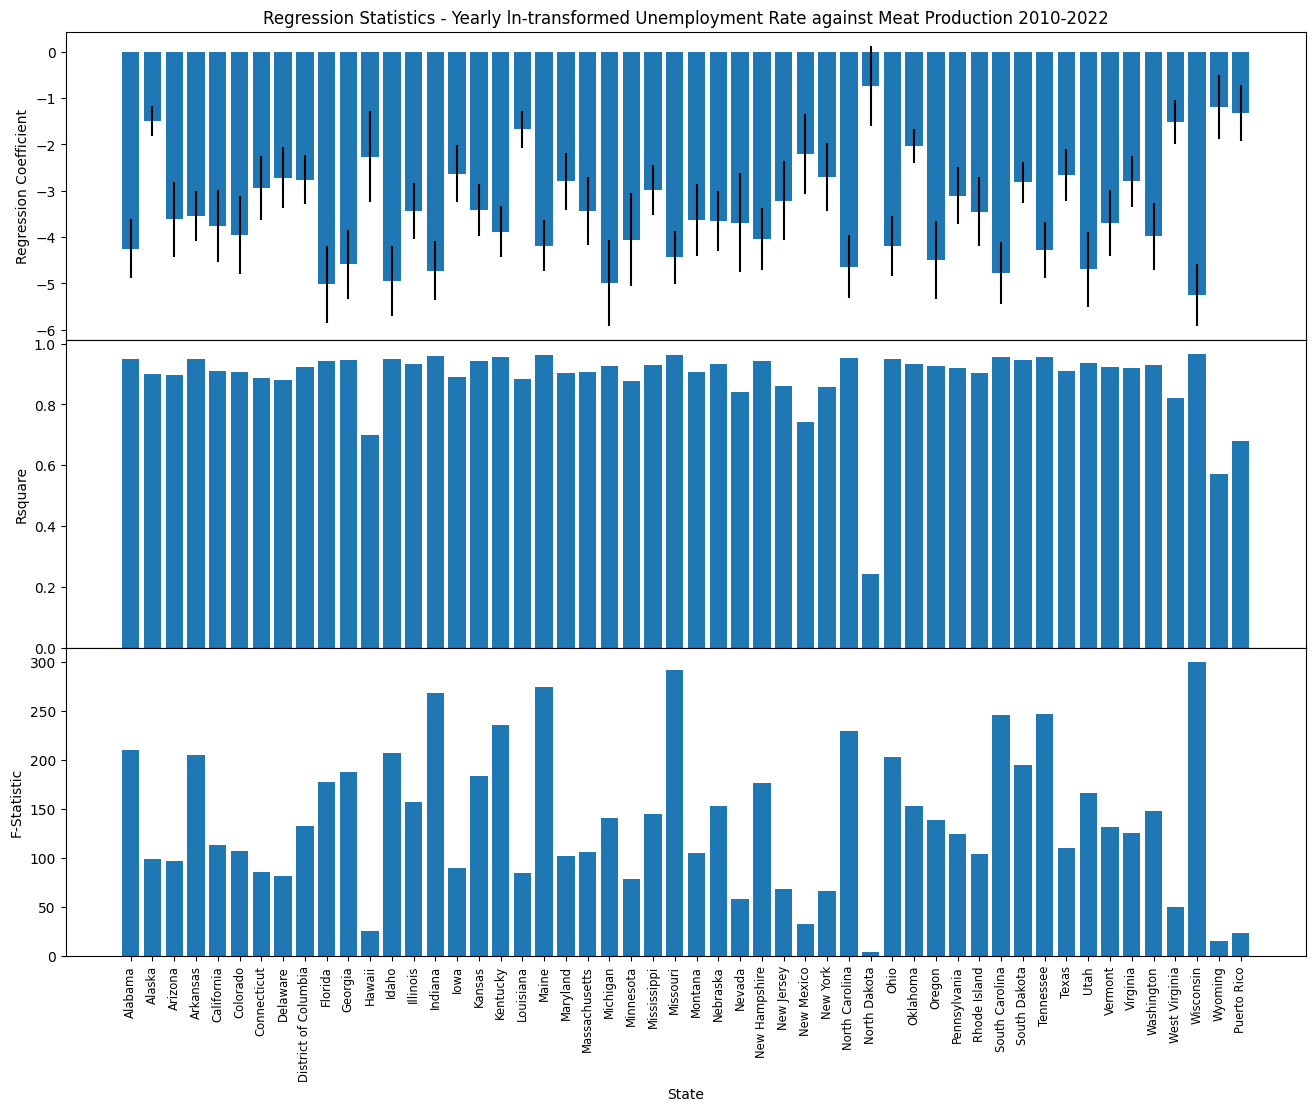

In [818]:
OLS_analysis(np.log(total_meat_production_series), 
             np.log(employment_grouped_df.loc[('Unemployment Rate',),'Percent']),
             all_states,
             "Yearly_OLS_ln")

plot_OLS_key_results('Yearly_OLS_ln',all_states, 'Regression Statistics - Yearly ln-transformed Unemployment Rate against Meat Production 2010-2022')

### Analysis among region

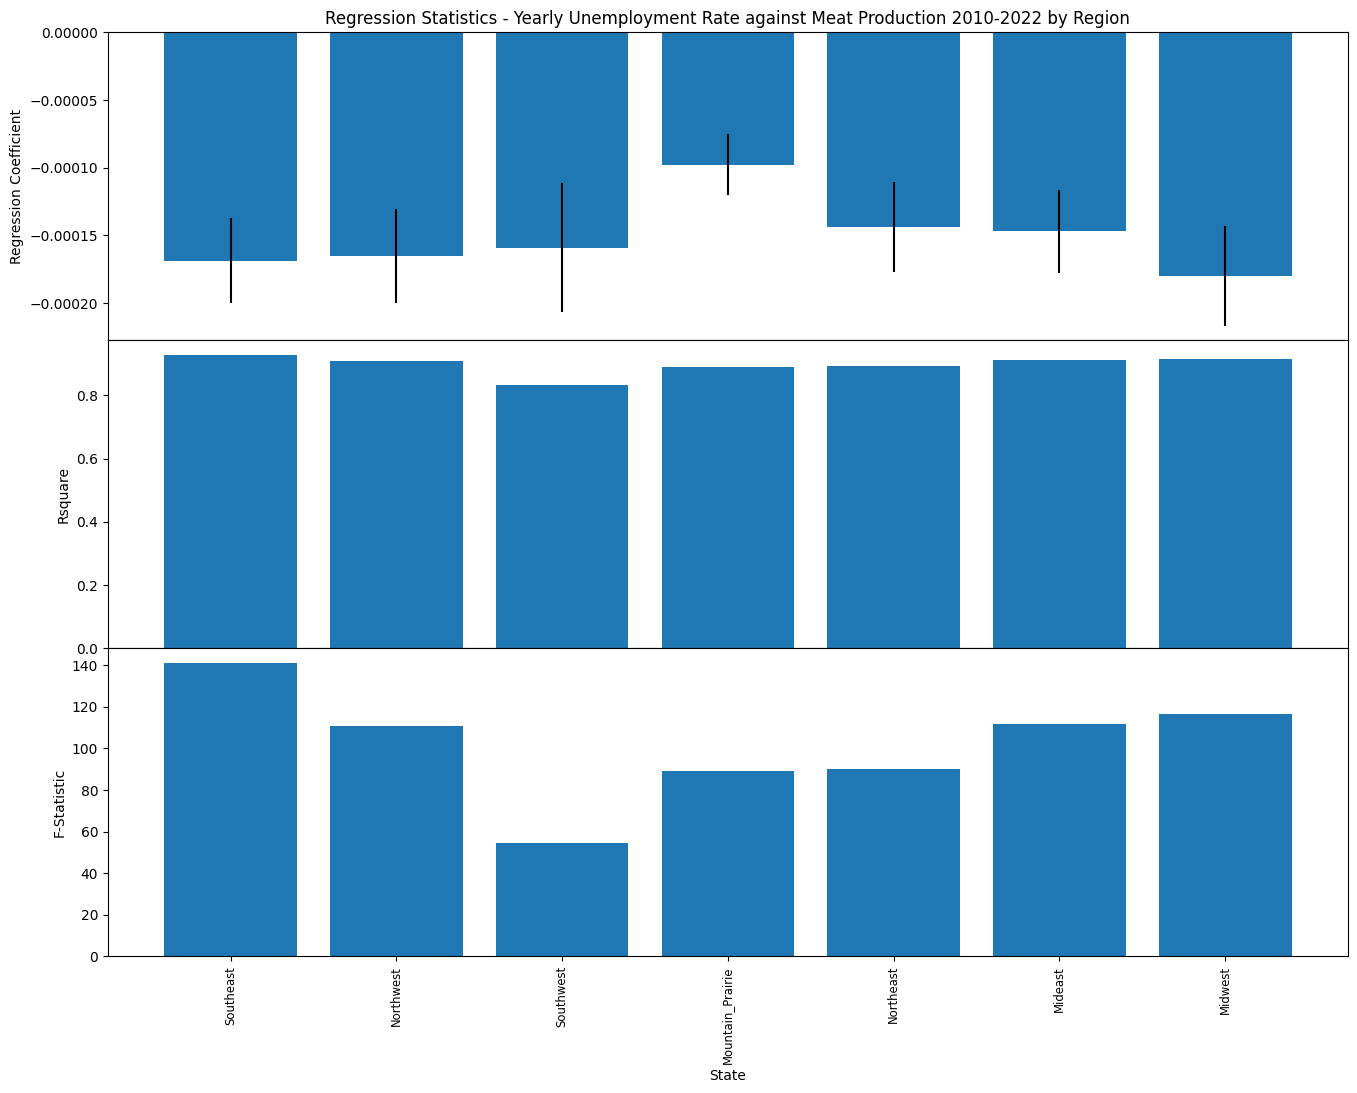

In [943]:
OLS_analysis(total_meat_production_series, 
             regional_UR,
             all_regions,
             "Yearly_OLS")

plot_OLS_key_results('Yearly_OLS',all_regions, 'Regression Statistics - Yearly Unemployment Rate against Meat Production 2010-2022 by Region')

### Analysis with lag

In [790]:
meat_production_2011_2023 = meat_production_df[(meat_production_df['Year']>=2011) & (meat_production_df['Year']<=2023)]

# give a 1 year lag
meat_production_2011_2023['Year'] = meat_production_2011_2023['Year'] - 1

# group the df
grouped_animal_df_lag1 = meat_production_2011_2023.groupby(['Animal','Year'])['Production'].sum()

# get series
total_meat_production_series_lag1 = grouped_animal_df_lag1.unstack(0).sum(axis=1)

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/1493900196.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_production_2011_2023['Year'] = meat_production_2011_2023['Year'] - 1


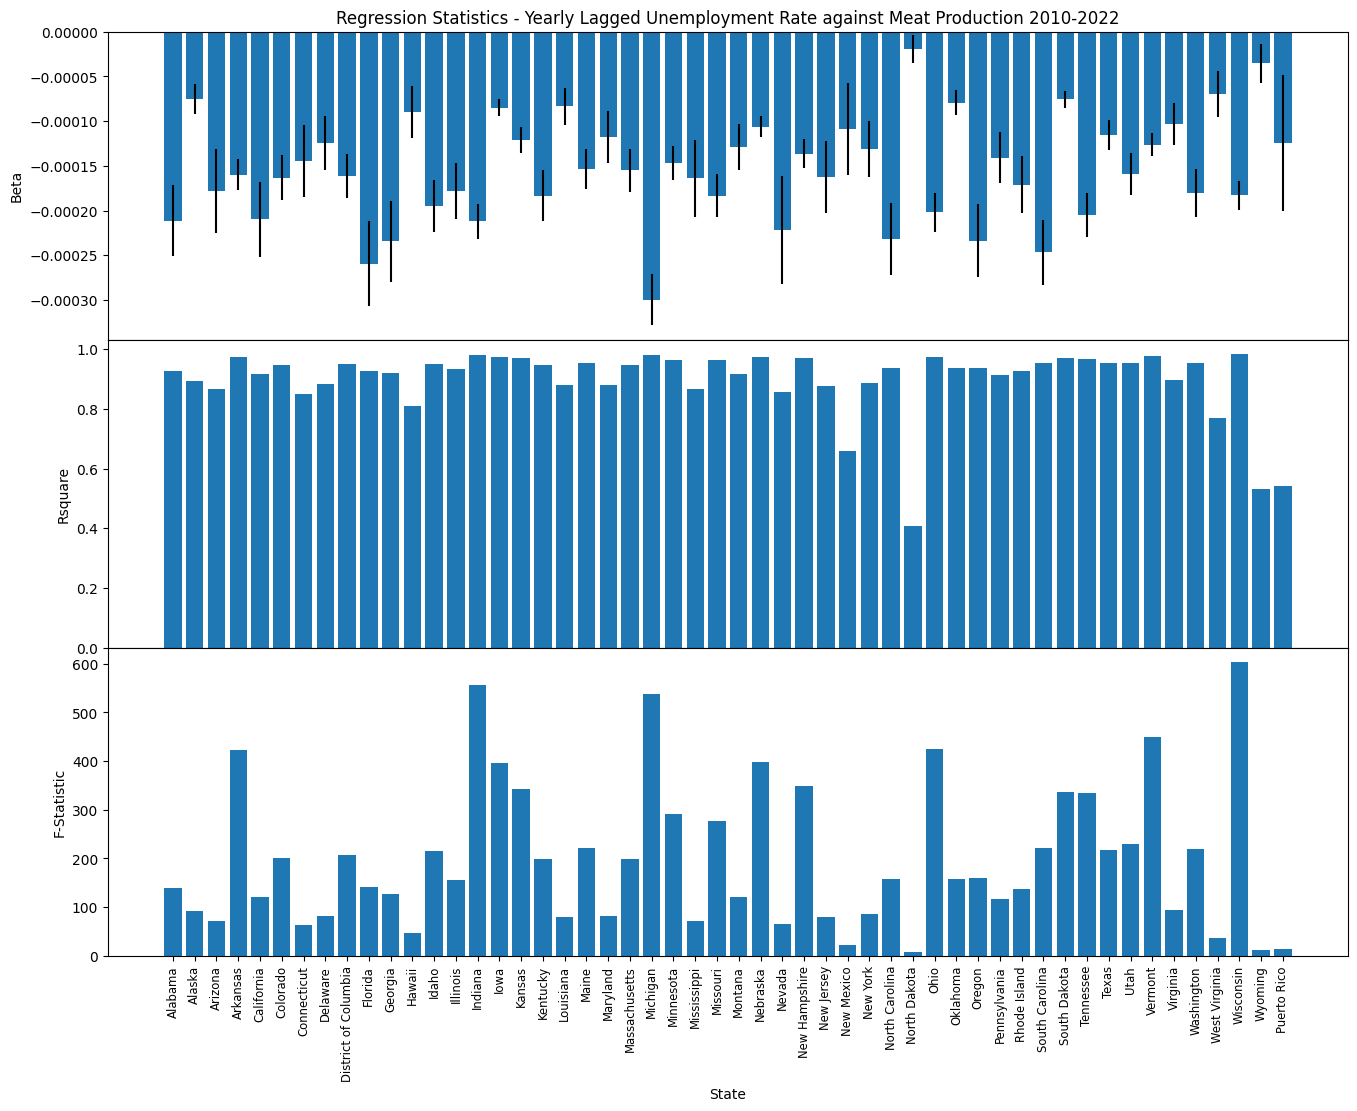

In [791]:
OLS_analysis(total_meat_production_series_lag1, 
             employment_grouped_df.loc[('Unemployment Rate',),'Percent'],
             all_states,
             "Yearly_OLS_lag1")

plot_OLS_key_results('Yearly_OLS_lag1',all_states, 'Regression Statistics - Yearly Lagged Unemployment Rate against Meat Production 2010-2022')

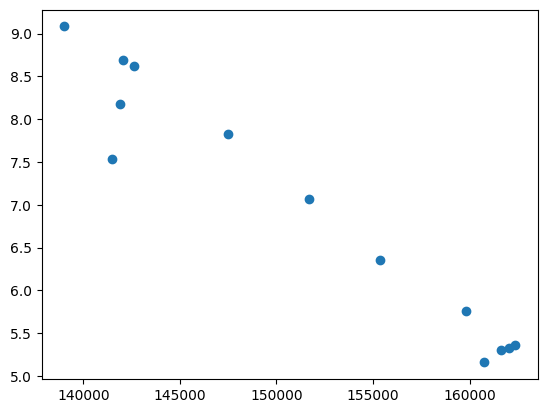

In [792]:
plt.scatter(total_meat_production_series_lag1,average_unemployment_rate.values)

### Red Meat vs Poultry trend

In [ ]:
OLS_analysis(total_meat_production_series_lag1, 
             employment_grouped_df.loc[('Unemployment Rate',),'Percent'],
             all_states,
             "Yearly_OLS_lag1")

plot_OLS_key_results('Yearly_OLS_lag1',all_states, 'Regression Statistics - Yearly Lagged Unemployment Rate against Meat Production 2010-2022')

## External Data (monthly unemployment rate) (By State)

In [793]:
monthly_unemployment_rate = pd.read_csv('Data/monthly_unemployment_rate.csv',header=1)

In [794]:
monthly_unemployment_rate = monthly_unemployment_rate.drop(['Region Code','Series ID'],axis=1,)

In [1021]:
monthly_UR = monthly_unemployment_rate.T
monthly_UR = monthly_UR.set_axis(monthly_UR.iloc[0], axis=1).drop('Region Name')

In [1045]:
monthly_UR.index = pd.to_datetime(monthly_UR.index)

In [795]:
external_all_states = monthly_unemployment_rate['Region Name'].unique()

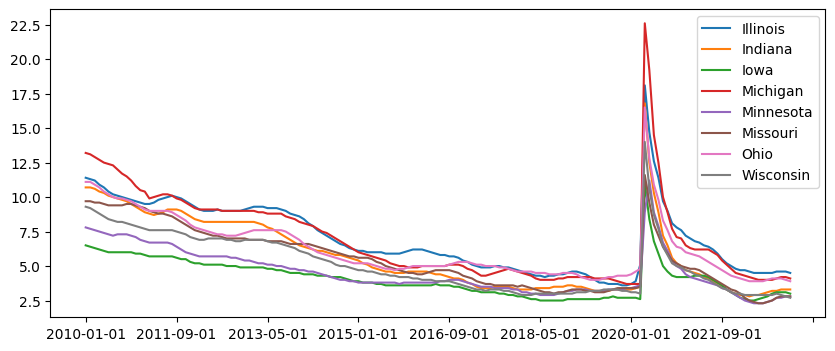

In [1026]:
region_dict = {
    'Mideast':[['Delaware', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee', 'Virginia', 'West Virginia']],
    'Midwest':[['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'Wisconsin']],
    'Mountain_Prairie':[['Colorado', 'Kansas', 'Montana', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']],
    'Northeast':[['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']],
    'Northwest':[['Alaska', 'Idaho', 'Oregon', 'Washington', 'District of Columbia']],
    'Southeast':[['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'Oklahoma', 'Puerto Rico', 'South Carolina', 'Texas']],
    'Southwest':[['Arizona', 'California', 'Hawaii', 'Nevada', 'New Mexico']]
}

plt.figure(figsize=(10, 4))


for state in region_dict['Midwest'][0]:
    monthly_UR.loc[:,state].plot(label=state)

plt.legend()

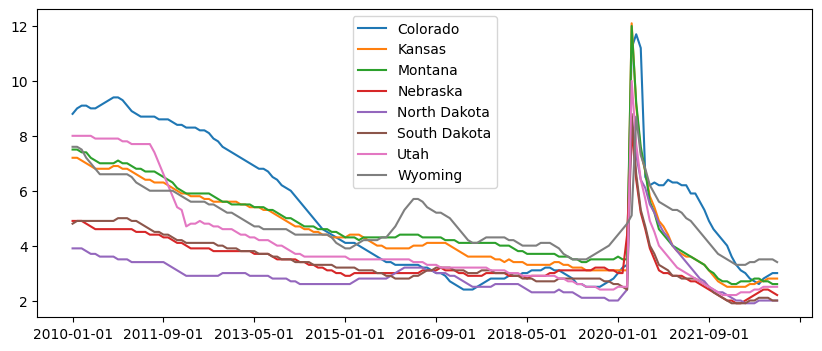

In [1027]:
plt.figure(figsize=(10, 4))


for state in region_dict['Mountain_Prairie'][0]:
    monthly_UR.loc[:,state].plot(label=state)

plt.legend()

In [1033]:
red_meat_df = meat_production_df[(meat_production_df['Type of Meat'] == 'Red Meat')].sort_index(ascending=False)
red_meat_df = red_meat_df.groupby(['Date', 'Year', 'Month']).sum()
red_meat_df = red_meat_df.reset_index()
red_meat_df.set_index('Date', inplace=True)

red_meat_df = red_meat_df.dropna()
red_meat_df = red_meat_df[red_meat_df.index > '2000-01-01']

decomposition = sm.tsa.seasonal_decompose(red_meat_df['Production'], period=13)

trend = decomposition.trend

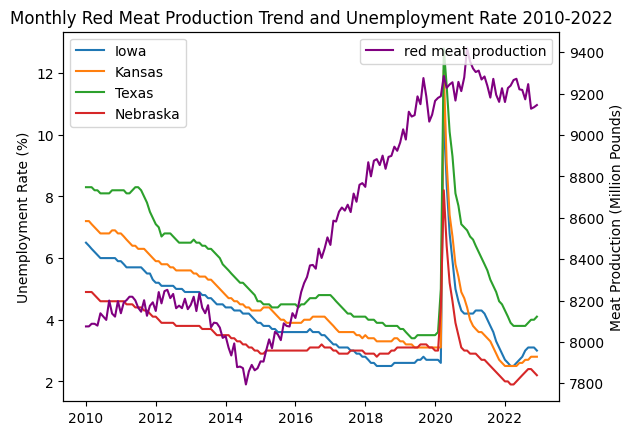

In [1062]:
# plt.figure(figsize=(10, 4))

fig, ax1 = plt.subplots()

for state in ['Iowa', 'Kansas','Texas','Nebraska']:
    ax1.plot(monthly_UR.loc[:,state],label=state)

ax1.set_ylabel('Unemployment Rate (%)')
ax2 = ax1.twinx()

ax2.plot(trend['2010-01-01':'2022-12-31'],label='red meat production',color='purple')
ax2.set_ylabel("Meat Production (Million Pounds)")
ax1.legend()
ax2.legend(loc='upper right')

plt.title("Monthly Red Meat Production Trend and Unemployment Rate 2010-2022")
plt.show()

In [799]:
# so we can group by year month later

meat_production_2010_2022['Month'] = meat_production_2010_2022['Month'].apply(lambda x: '0' + str(x) if len(str(x)) < 2 else x)

meat_production_2010_2022['Year-Month'] = meat_production_2010_2022['Year'].astype(str) + '_' + \
                                            meat_production_2010_2022['Month'].astype(str)

monthly_meat_production_series = meat_production_2010_2022.groupby('Year-Month')['Production'].sum()

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/2317819450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_production_2010_2022['Month'] = meat_production_2010_2022['Month'].apply(lambda x: '0' + str(x) if len(str(x)) < 2 else x)
/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/2317819450.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meat_production_2010_2022['Year-Month'] = meat_production_2010_2022['Year'].astype(str) + '_' + \


In [1125]:
# small fix to the function, could probably make it more generalized later
def OLS_analysis_FRED(meat_production_series, monthly_unemployment_rate, all_states, experiment_name):
    
    results_list = []
    rsquare = np.zeros((len(all_states),))
    pvalues = np.zeros((len(all_states),))
    fstat = np.zeros((len(all_states),))
    beta = np.zeros((len(all_states),))
    beta_95CI = np.zeros((2, len(all_states)))
    # run the OLS regression and store the results
    for n, state in enumerate(all_states):
        UR  = monthly_unemployment_rate.loc[:,state].values
        model = sm.OLS(UR, sm.add_constant(meat_production_series.values))
        results = model.fit()
        results_list.append(results)
        rsquare[n] = results.rsquared
        fstat[n] = results.fvalue
        beta[n] = results.params[1]
        beta_95CI[:,n] = results.conf_int(alpha=0.05)[1,:]
        

    OLS_results[experiment_name] = {
            'result_runs': results_list,
            'rsquare': rsquare,
            'pvalues': pvalues,
            'fstat': fstat,
            'beta': beta,
            'beta_95CI': beta_95CI,
    }
    

### Red meat vs poultary

In [1106]:
results = model.fit()

In [1191]:
OLS_results['Monthly_OLS']['rsquare'].mean()

0.1857360482953775

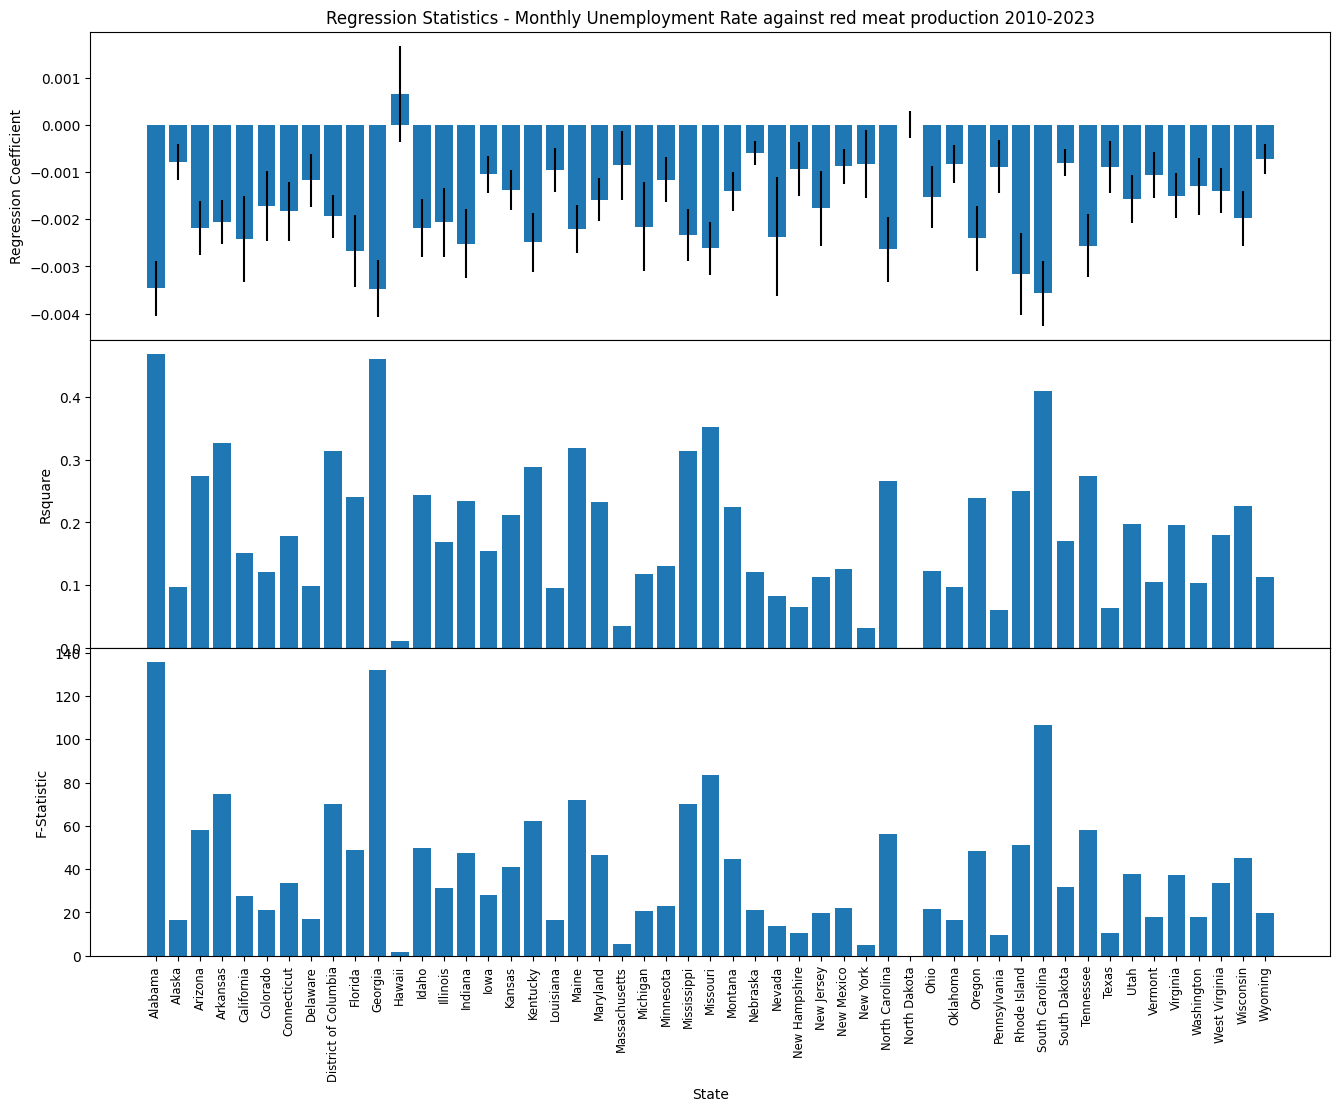

In [1116]:
OLS_analysis_FRED(trend['2010-01-01':'2022-12-31'], 
             monthly_UR,
             external_all_states,
             "Monthly_OLS")

plot_OLS_key_results('Monthly_OLS',external_all_states, 'Regression Statistics - Monthly Unemployment Rate against red meat production 2010-2023')

In [1197]:
OLS_results['Monthly_OLS_no_covid']['rsquare'].mean()

0.42329091523115325

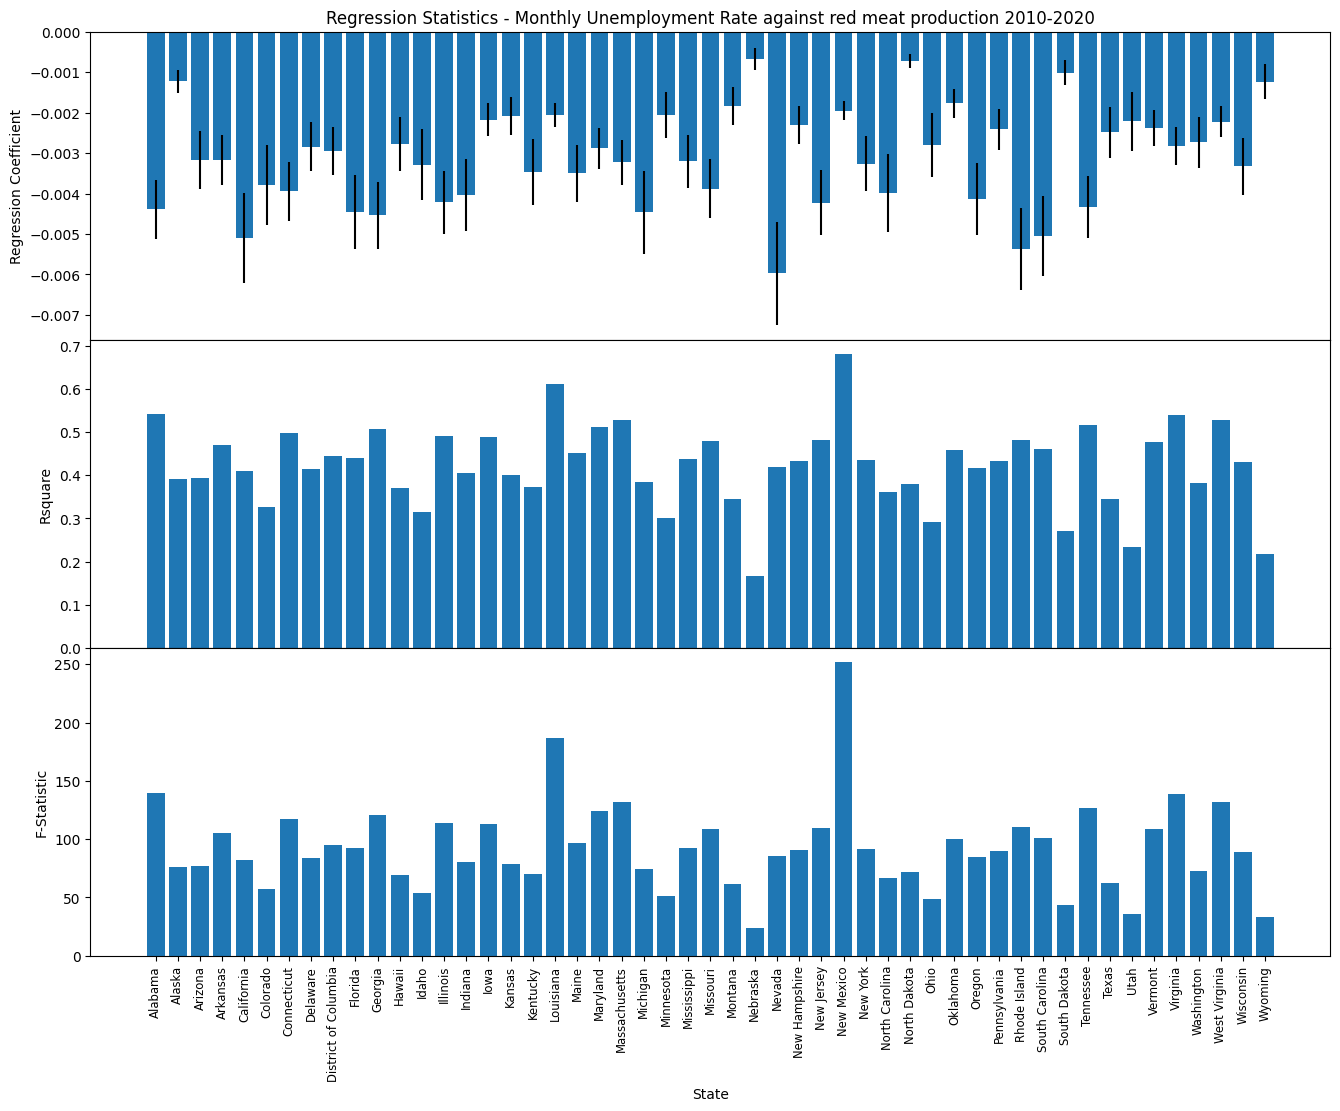

In [1114]:
OLS_analysis_FRED(trend['2010-01-01':'2019-12-31'], 
             monthly_UR.loc['2010-01-01':'2019-12-31'],
             external_all_states,
             "Monthly_OLS_no_covid")

plot_OLS_key_results('Monthly_OLS_no_covid',external_all_states, 'Regression Statistics - Monthly Unemployment Rate against red meat production 2010-2020')

In [1117]:
poultry_meat_df = meat_production_df[(meat_production_df['Type of Meat'] == 'Poultry')].sort_index(ascending=False)
poultry_meat_df = poultry_meat_df.groupby(['Date', 'Year', 'Month']).sum()
poultry_meat_df = poultry_meat_df.reset_index()
poultry_meat_df.set_index('Date', inplace=True)

poultry_meat_df = poultry_meat_df.dropna()
poultry_meat_df = poultry_meat_df[poultry_meat_df.index > '2000-01-01']

poultry_decomposition = sm.tsa.seasonal_decompose(poultry_meat_df['Production'], period=13)

poultry_trend = poultry_decomposition.trend

In [1193]:
OLS_results['Monthly_OLS_poultry']['rsquare'].mean()

0.38334345319784136

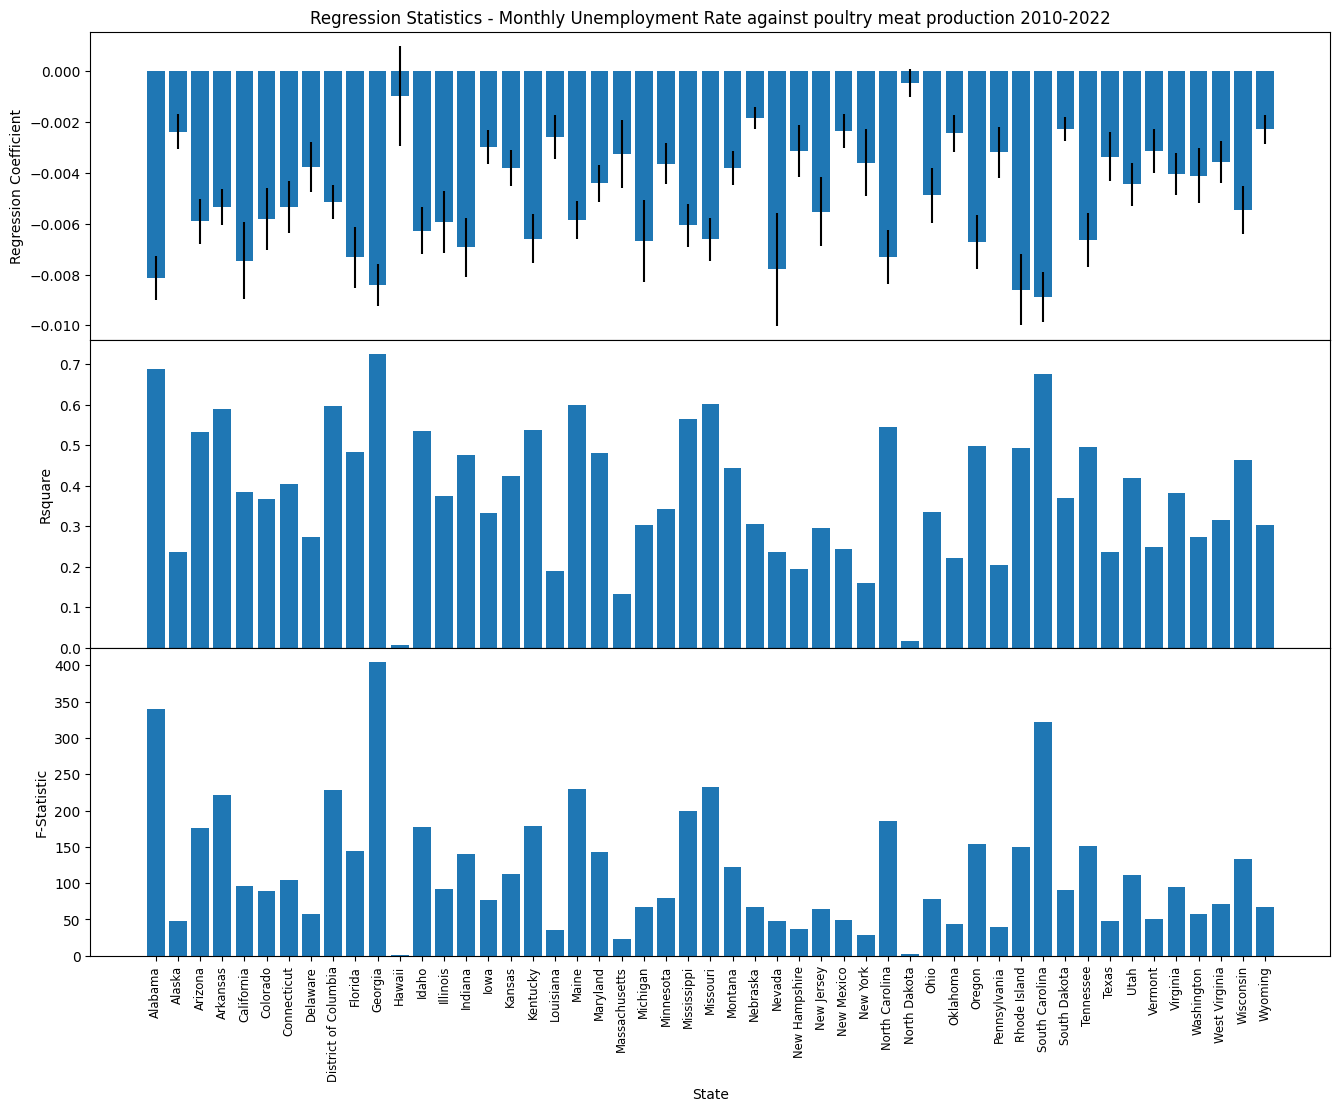

In [1192]:
OLS_analysis_FRED(poultry_trend['2010-01-01':'2022-12-31'], 
             monthly_UR.loc['2010-01-01':'2022-12-31'],
             external_all_states,
             "Monthly_OLS_poultry")

plot_OLS_key_results('Monthly_OLS_poultry',external_all_states, 'Regression Statistics - Monthly Unemployment Rate against poultry meat production 2010-2022')

In [1195]:
OLS_results['Monthly_OLS_no_covid_poultry']['rsquare'].mean()

0.836492457001219

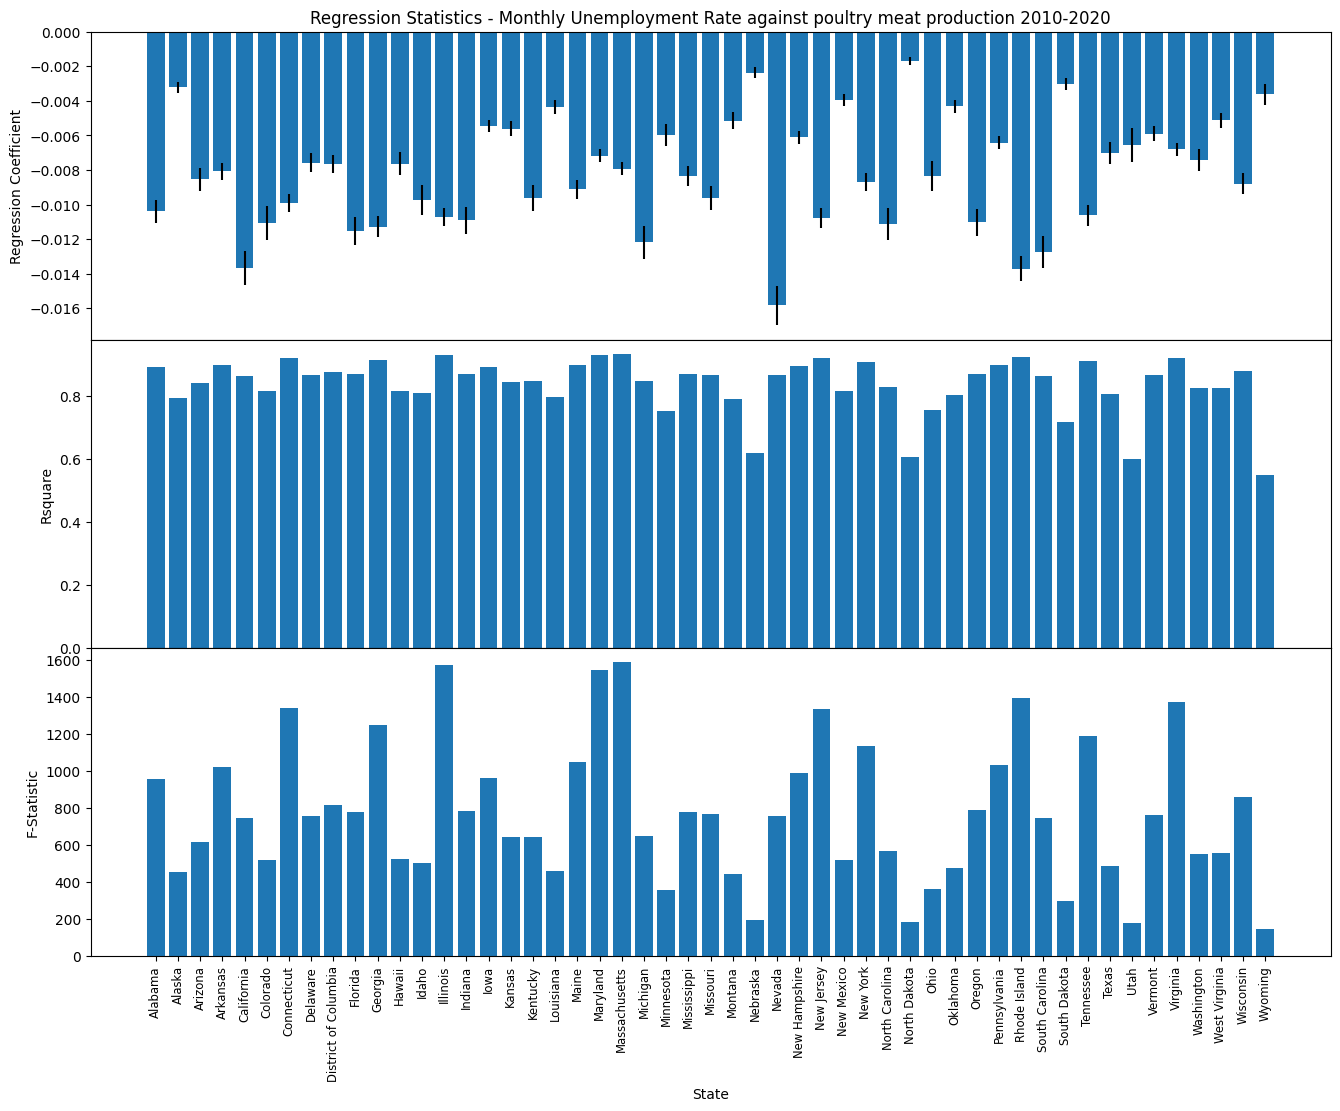

In [1126]:
OLS_analysis_FRED(poultry_trend['2010-01-01':'2019-12-31'], 
             monthly_UR.loc['2010-01-01':'2019-12-31'],
             external_all_states,
             "Monthly_OLS_no_covid_poultry")

plot_OLS_key_results('Monthly_OLS_no_covid_poultry',external_all_states, 'Regression Statistics - Monthly Unemployment Rate against poultry meat production 2010-2020')

### Lag 

In [1130]:
trend.shift(-12)

Date
2000-02-01    7573.000000
2000-03-01    7503.846154
2000-04-01    7565.307692
2000-05-01    7546.307692
2000-06-01    7529.538462
                 ...     
2023-08-01            NaN
2023-09-01            NaN
2023-10-01            NaN
2023-11-01            NaN
2023-12-01            NaN
Name: trend, Length: 287, dtype: float64

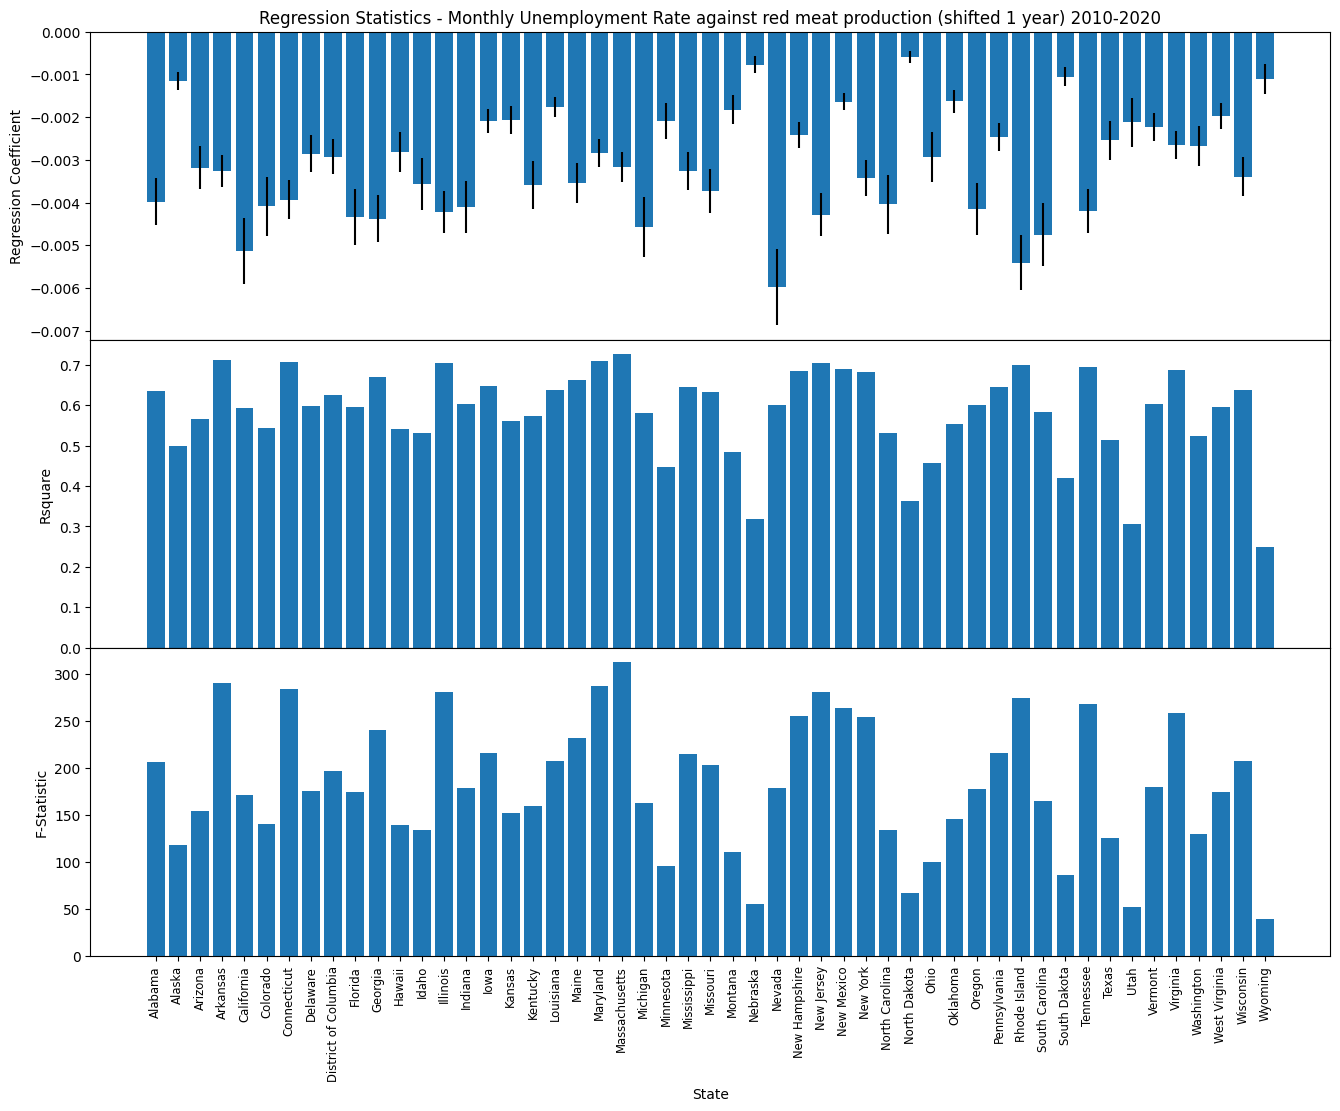

In [1132]:
OLS_analysis_FRED(trend.shift(-12)['2010-01-01':'2019-12-31'], 
             monthly_UR.loc['2010-01-01':'2019-12-31'],
             external_all_states,
             "Monthly_OLS_1_year_shift")

plot_OLS_key_results('Monthly_OLS_1_year_shift',external_all_states, 'Regression Statistics - Monthly Unemployment Rate against red meat production (shifted 1 year) 2010-2020')

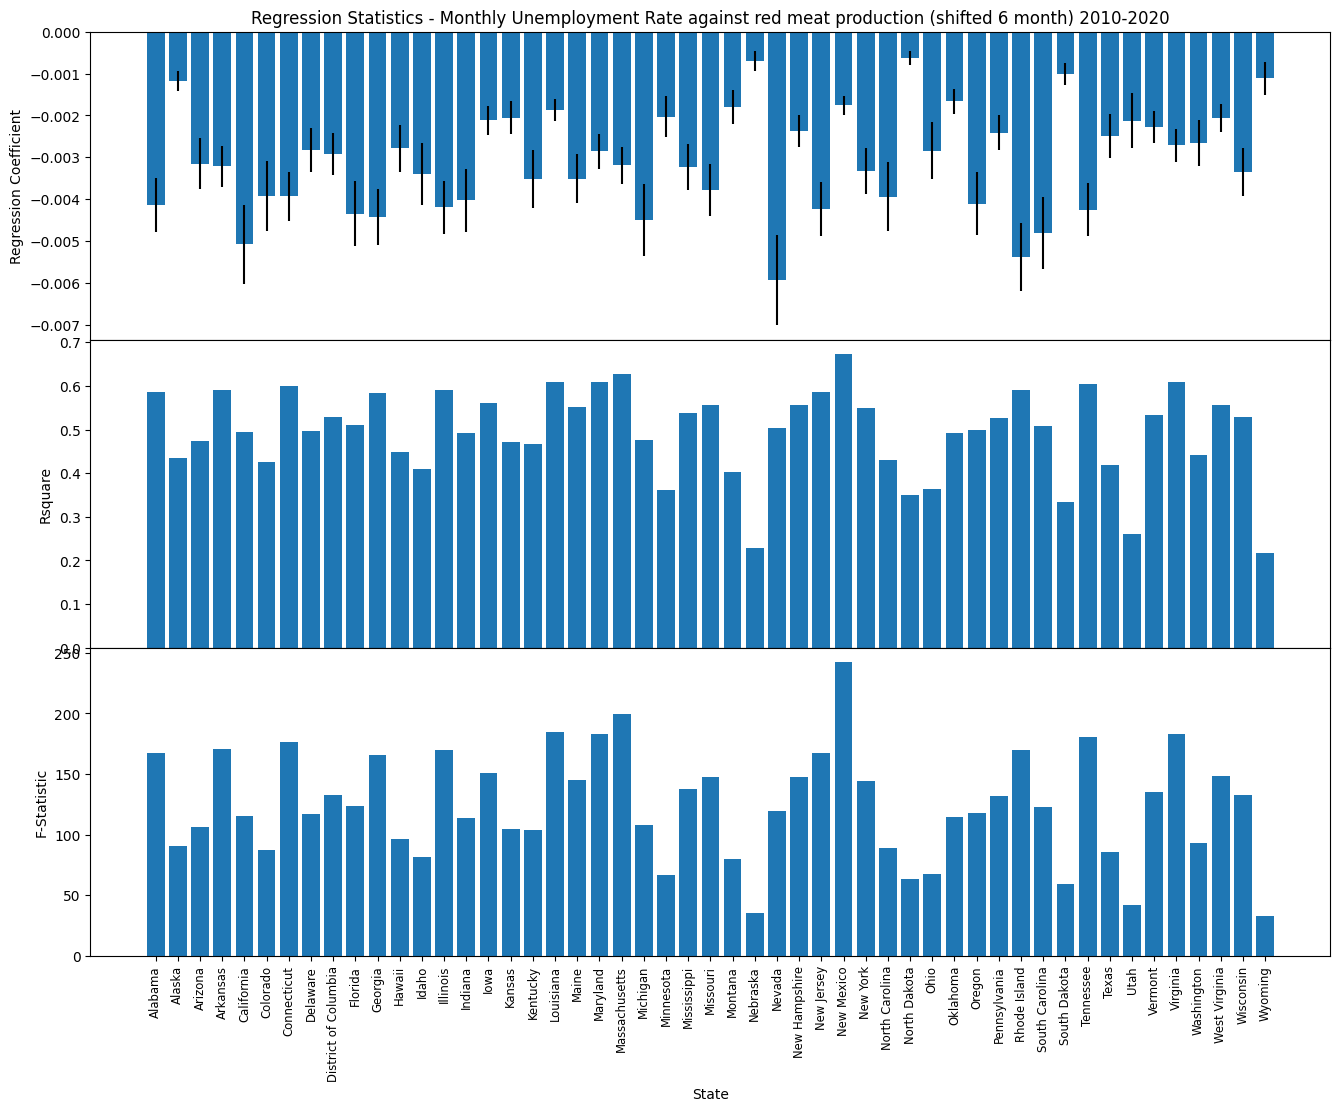

In [1133]:
OLS_analysis_FRED(trend.shift(-6)['2010-01-01':'2019-12-31'], 
             monthly_UR.loc['2010-01-01':'2019-12-31'],
             external_all_states,
             "Monthly_OLS_6_month_shift")

plot_OLS_key_results('Monthly_OLS_6_month_shift',external_all_states, 'Regression Statistics - Monthly Unemployment Rate against red meat production (shifted 6 month) 2010-2020')

## External Data (monthly unemployment rate) (By Region)

In [1141]:
region_dict = {
    'Mideast':[['Delaware', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee', 'Virginia', 'West Virginia']],
    'Midwest':[['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'Wisconsin']],
    'Mountain_Prairie':[['Colorado', 'Kansas', 'Montana', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']],
    'Northeast':[['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']],
    'Northwest':[['Alaska', 'Idaho', 'Oregon', 'Washington', 'District of Columbia']],
    'Southeast':[['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'Oklahoma', 'South Carolina', 'Texas']], #'Puerto Rico'
    'Southwest':[['Arizona', 'California', 'Hawaii', 'Nevada', 'New Mexico']]
}

state_to_region = {state: region for region, states in region_dict.items() for state in states[0]}

employment_df['Region'] = employment_df['State'].map(state_to_region)

all_regions = employment_df.Region.unique()

/var/folders/fm/rwn89n9x1b94vk3rbr72zvtw0000gn/T/ipykernel_73237/4067840381.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_df['Region'] = employment_df['State'].map(state_to_region)


In [1155]:
all_regions = all_regions[:-1]

In [1156]:
# construct monthly UR
monthly_UR_region = []
for region in all_regions:
    monthly_UR_region.append(monthly_UR.loc[:,region_dict[region][0]].mean(axis=1))

monthly_UR_region = pd.concat(monthly_UR_region, axis=1)
monthly_UR_region.columns = all_regions

In [1169]:
monthly_UR_region.head()

,Southeast,Northwest,Southwest,Mountain_Prairie,Northeast,Mideast,Midwest
2010-01-01,9.511111,9.62,10.28,6.5875,8.811111,9.485714,9.9625
2010-02-01,9.477778,9.6,10.3,6.625,8.8,9.428571,9.9
2010-03-01,9.444444,9.56,10.34,6.6,8.777778,9.357143,9.7625
2010-04-01,9.333333,9.46,10.3,6.525,8.677778,9.2,9.6
2010-05-01,9.255556,9.34,10.26,6.425,8.577778,9.057143,9.4375


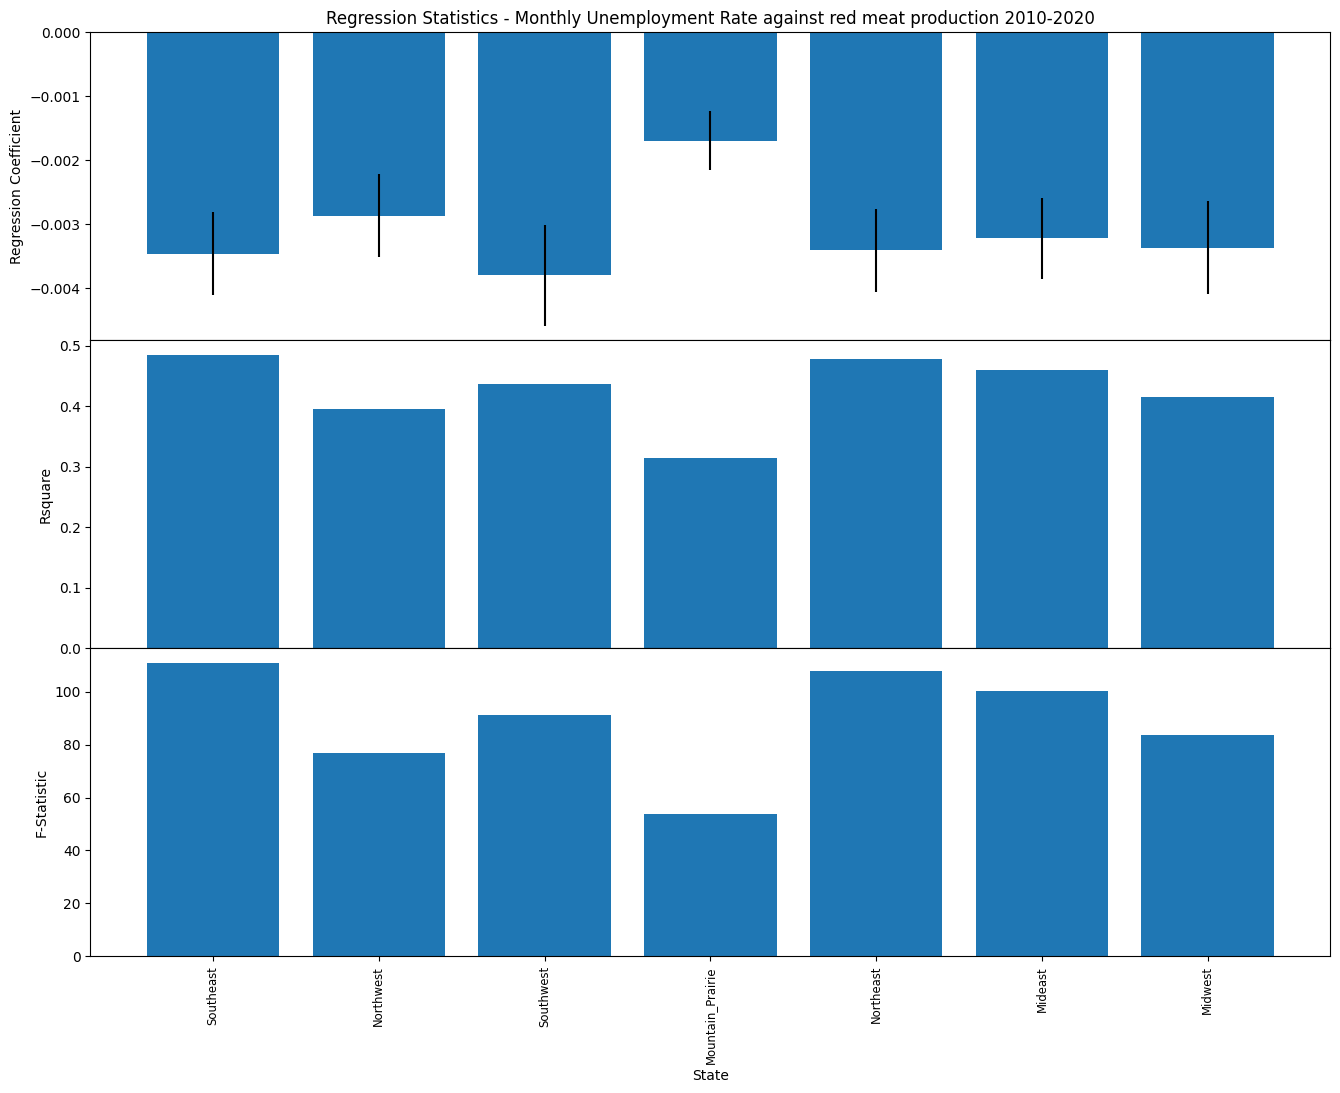

In [1160]:
OLS_analysis_FRED(trend['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat")

plot_OLS_key_results('Monthly_OLS_region_redmeat',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production 2010-2020')

### Lag analysis (Red Meat)

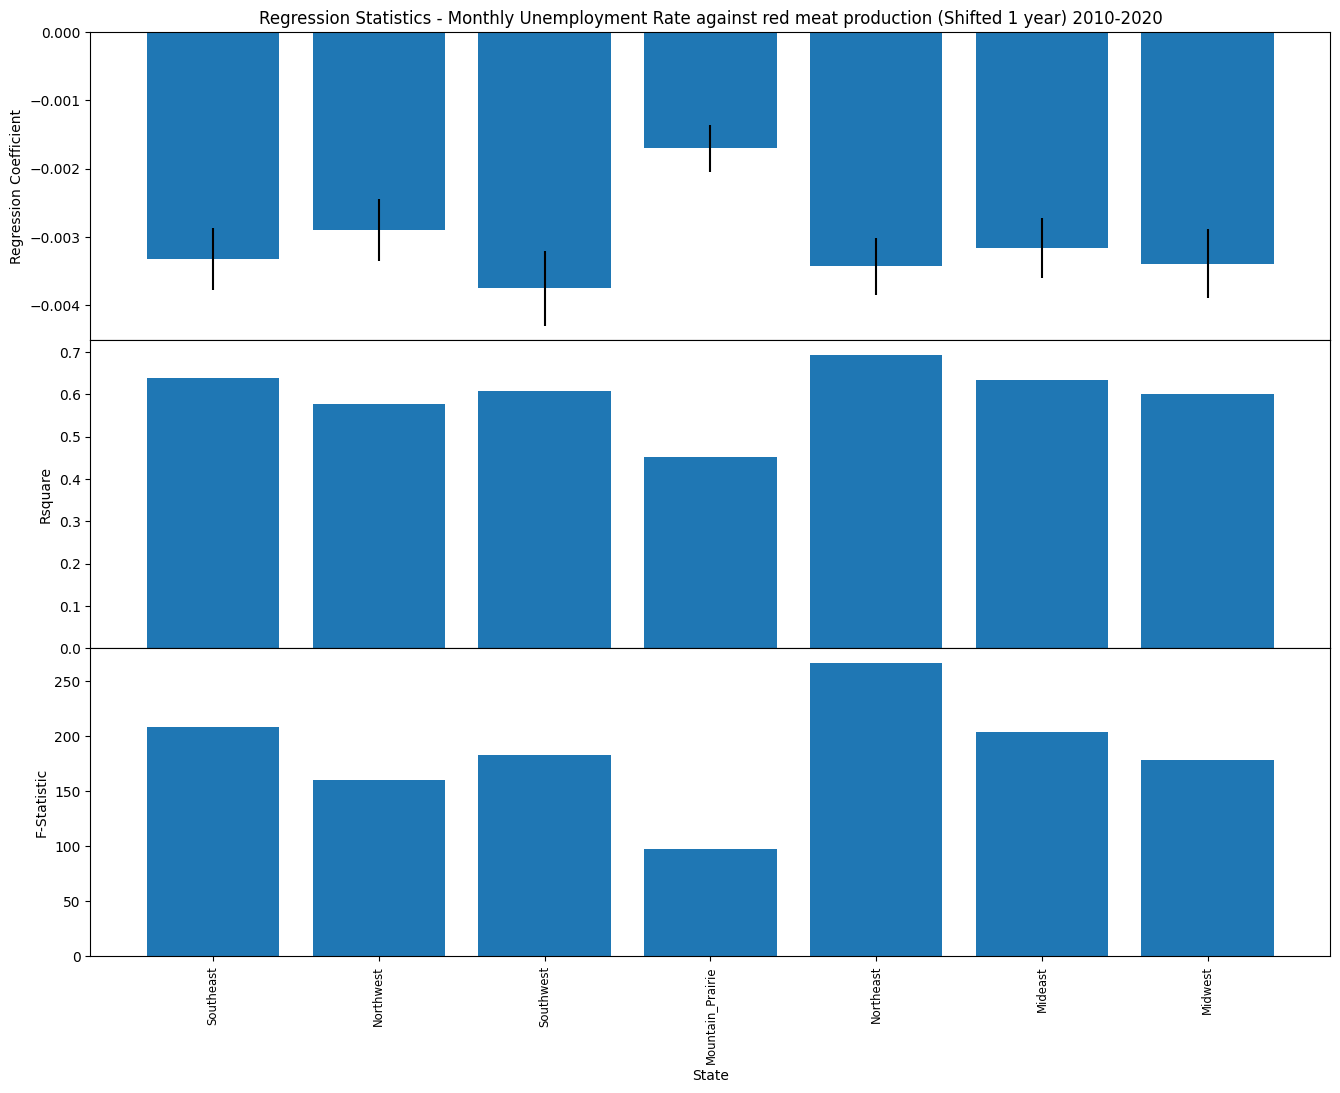

In [1161]:
OLS_analysis_FRED(trend.shift(-12)['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat_shifted1year")

plot_OLS_key_results('Monthly_OLS_region_redmeat_shifted1year',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production (Shifted 1 year) 2010-2020')

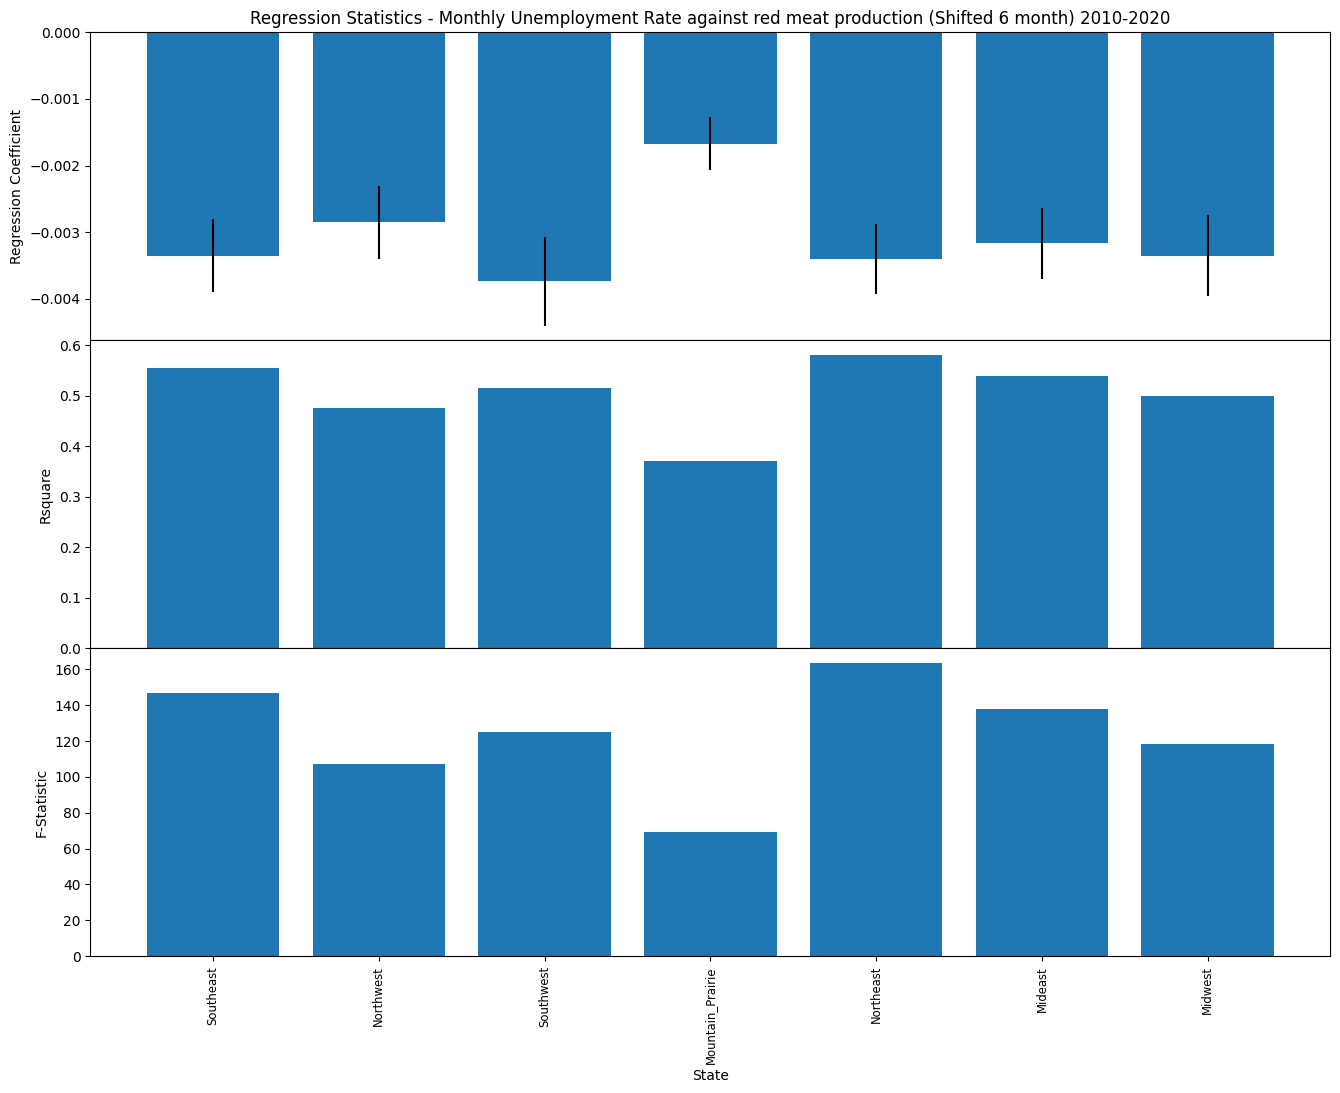

In [1165]:
OLS_analysis_FRED(trend.shift(-6)['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat_shifted6month")

plot_OLS_key_results('Monthly_OLS_region_redmeat_shifted6month',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production (Shifted 6 month) 2010-2020')

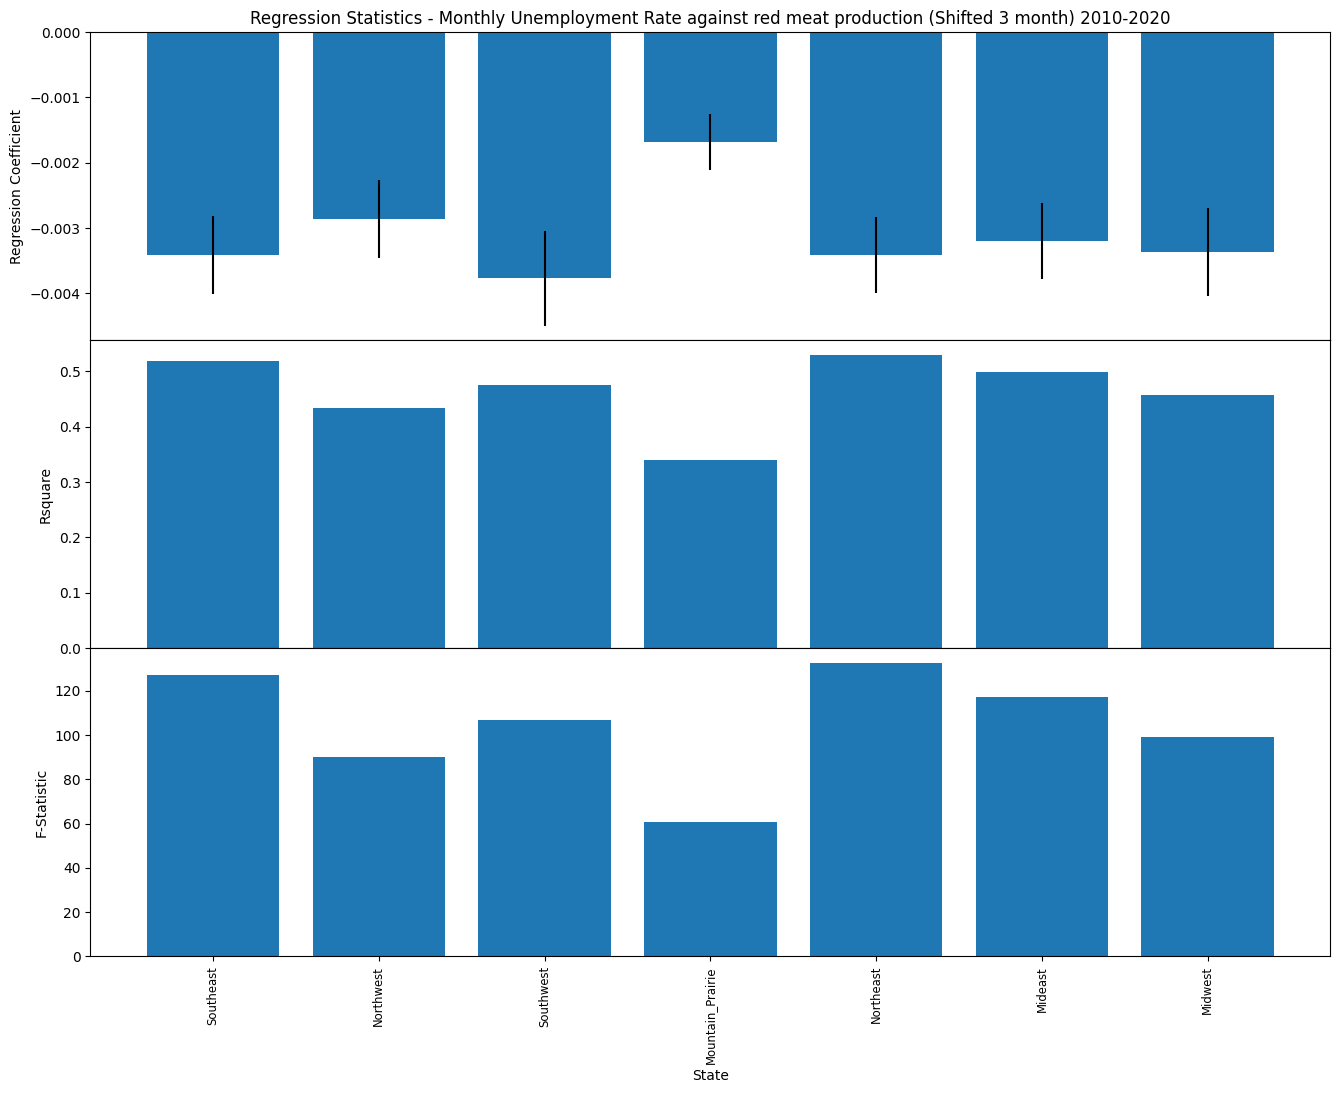

In [1166]:
OLS_analysis_FRED(trend.shift(-3)['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat_shifted3month")

plot_OLS_key_results('Monthly_OLS_region_redmeat_shifted3month',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production (Shifted 3 month) 2010-2020')

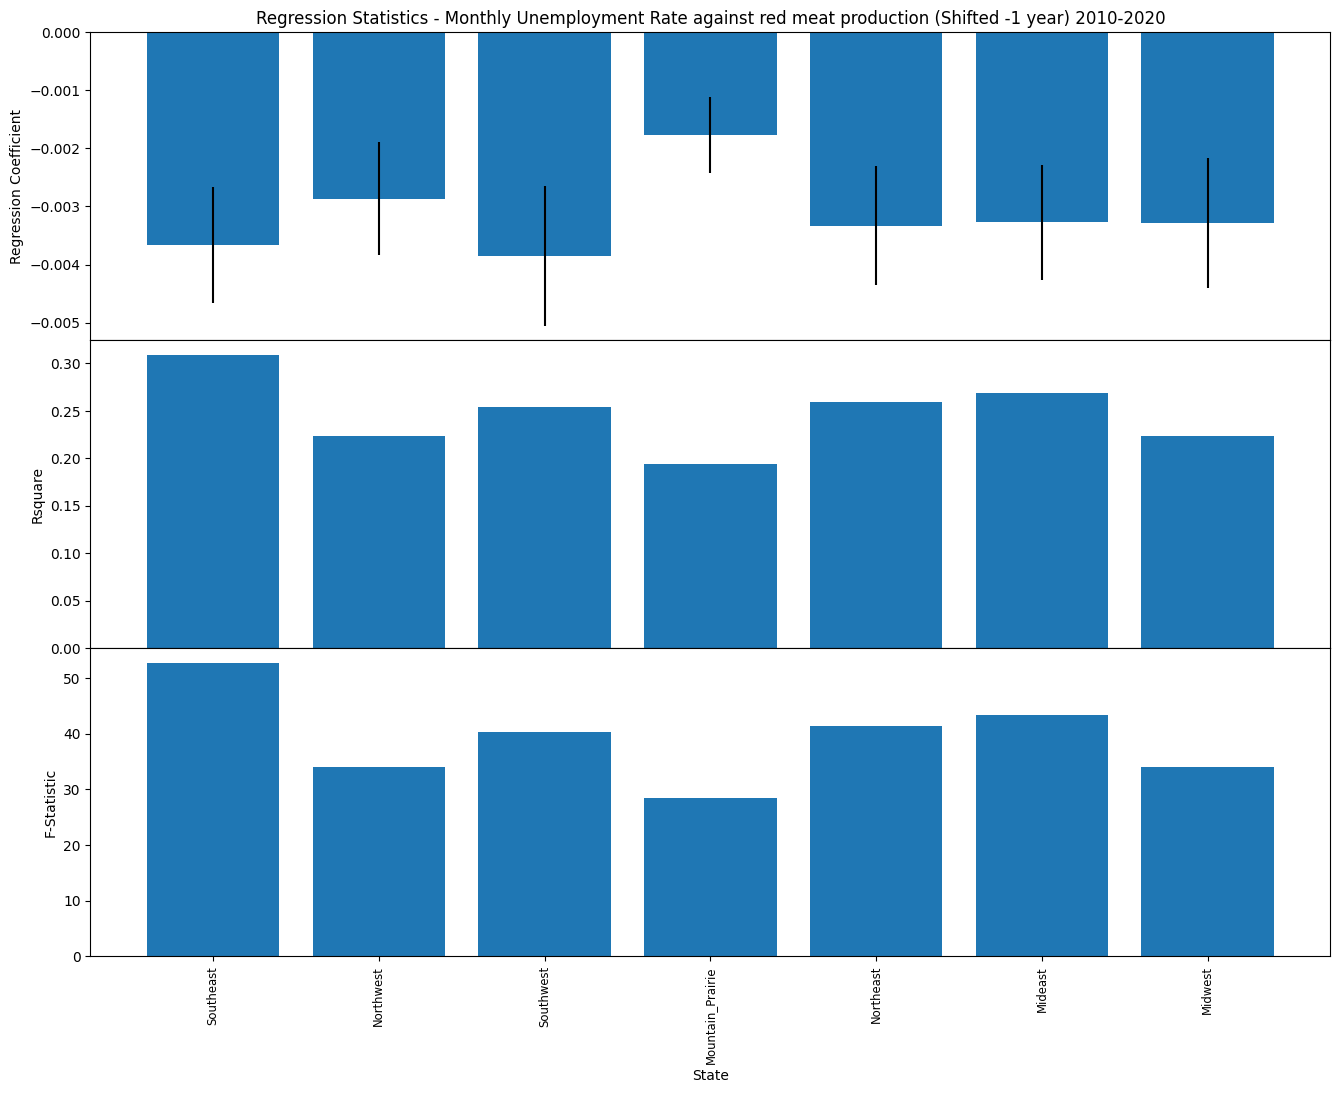

In [1164]:
OLS_analysis_FRED(trend.shift(12)['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat_shifted-1year")

plot_OLS_key_results('Monthly_OLS_region_redmeat_shifted-1year',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production (Shifted -1 year) 2010-2020')

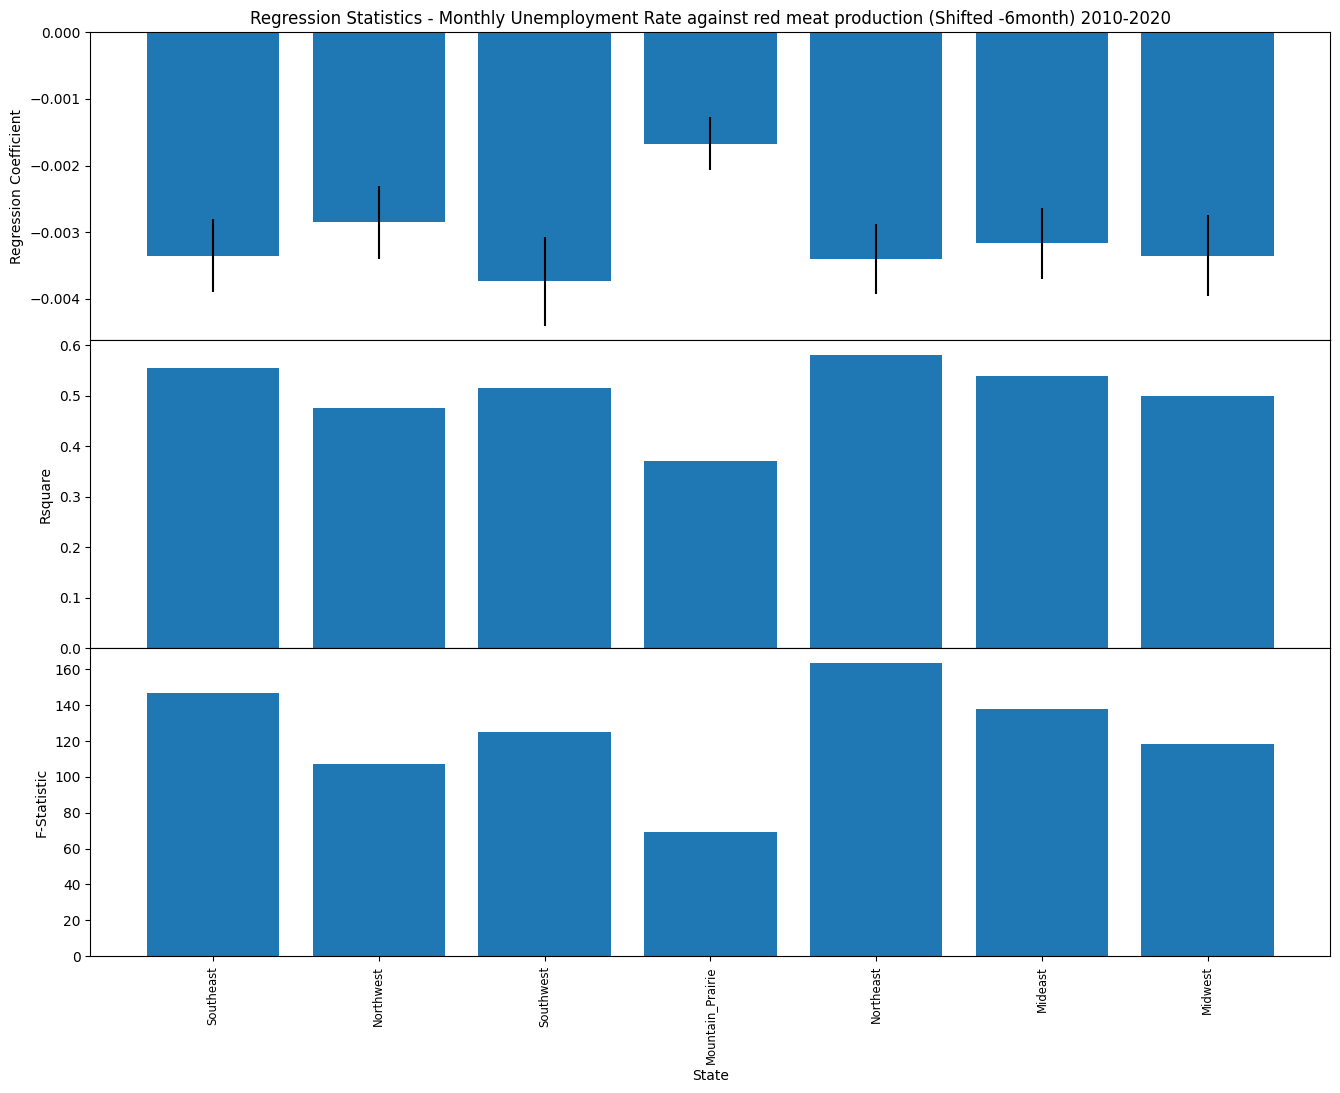

In [1167]:
OLS_analysis_FRED(trend.shift(-6)['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat_shifted-6month")

plot_OLS_key_results('Monthly_OLS_region_redmeat_shifted-6month',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production (Shifted -6month) 2010-2020')

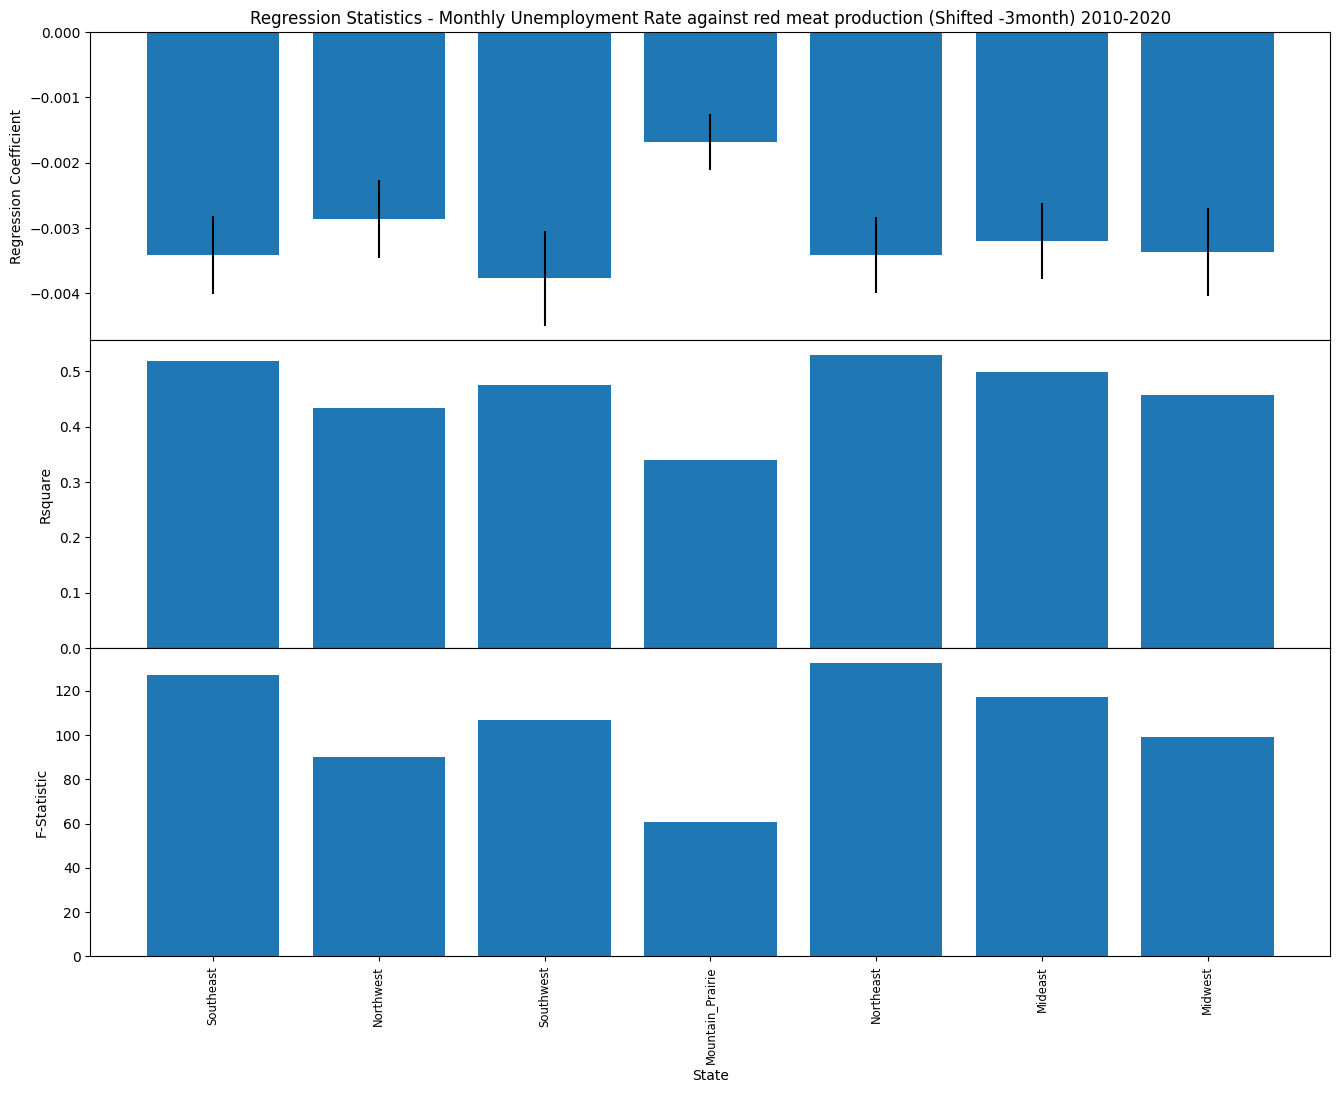

In [1168]:
OLS_analysis_FRED(trend.shift(-3)['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_redmeat_shifted-3month")

plot_OLS_key_results('Monthly_OLS_region_redmeat_shifted-3month',all_regions, 'Regression Statistics - Monthly Unemployment Rate against red meat production (Shifted -3month) 2010-2020')

### Analysis Poultry

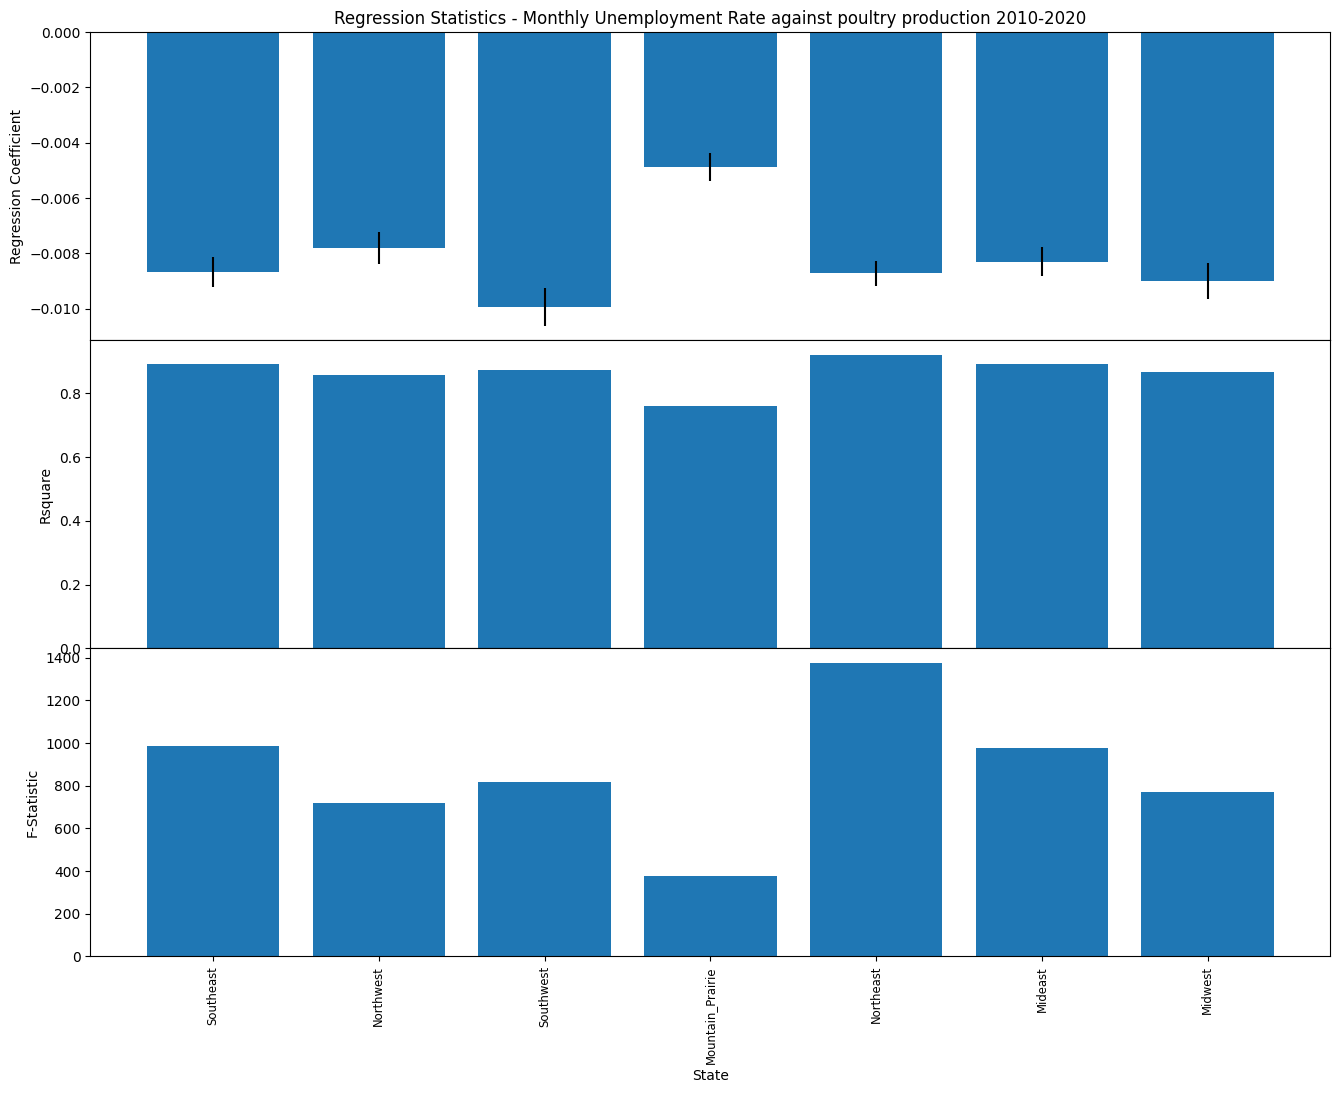

In [1163]:
OLS_analysis_FRED(poultry_trend['2010-01-01':'2019-12-31'], 
             monthly_UR_region['2010-01-01':'2019-12-31'],
             all_regions,
             "Monthly_OLS_region_poultry")

plot_OLS_key_results('Monthly_OLS_region_poultry',all_regions, 'Regression Statistics - Monthly Unemployment Rate against poultry production 2010-2020')

## Industry, Occupation, Workers

In [684]:
industry_df = economic_df[economic_df['Category']=='INDUSTRY']
occupation_df = economic_df[economic_df['Category']=='OCCUPATION']
workers_df = economic_df[economic_df['Category']=='CLASS OF WORKER']

In [692]:
industry_df['Label (Grouping)'].unique()

array(['Civilian employed population 16 years and over',
       'Agriculture, forestry, fishing and hunting, and mining',
       'Construction', 'Manufacturing', 'Wholesale trade', 'Retail trade',
       'Transportation and warehousing, and utilities', 'Information',
       'Finance and insurance, and real estate and rental and leasing',
       'Professional, scientific, and management, and administrative and waste management services',
       'Educational services, and health care and social assistance',
       'Arts, entertainment, and recreation, and accommodation and food services',
       'Other services, except public administration',
       'Public administration'], dtype=object)

In [957]:
rm_industry = industry_df[industry_df['Label (Grouping)'] == 'Agriculture, forestry, fishing and hunting, and mining']

In [958]:
rm_industry_grouped = rm_industry.groupby(['State','Year'])['Estimate'].mean()

In [959]:
rm_industry_by_state = rm_industry.groupby('State')['Estimate'].mean()

top10_rm_state = rm_industry_by_state.sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 Raw Material Producing States 2010-2021')

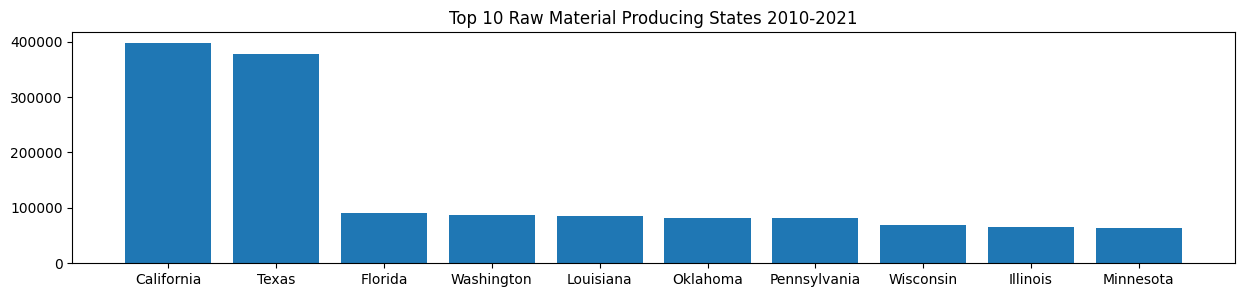

In [960]:
plt.figure(figsize=(15,3))
plt.bar(top10_rm_state.index,top10_rm_state)
plt.title("Top 10 Raw Material Producing States 2010-2021")

In [970]:
state_population = industry_df[industry_df['Label (Grouping)'] == 'Civilian employed population 16 years and over'].groupby(['State'])['Estimate'].mean()
rm_industry_by_state = rm_industry.groupby(['State'])['Estimate'].mean()

rm_population_ratio_state = rm_industry_by_state/state_population
top10_rm_population_ratio_state = rm_population_ratio_state.sort_values(ascending=False)[:10]

Text(0.5, 1.0, 'Top 10 Raw Material to Employed Population by States 2010-2021')

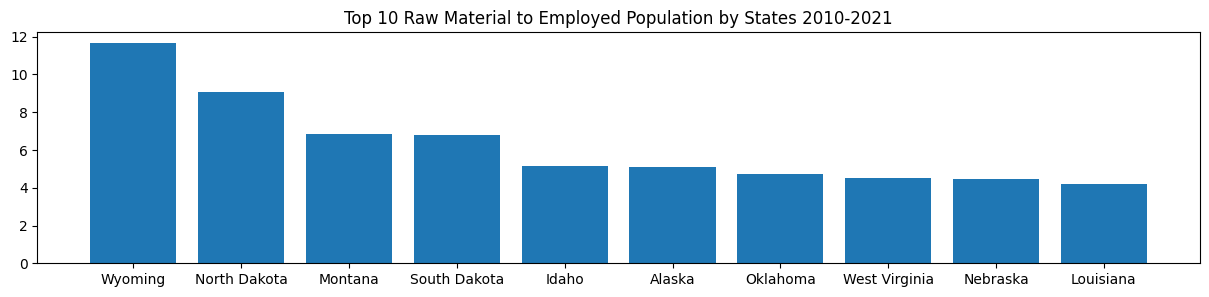

In [971]:
plt.figure(figsize=(15,3))
plt.bar(top10_rm_population_ratio_state.index,top10_rm_population_ratio_state*100)
plt.title("Top 10 Raw Material to Employed Population by States 2010-2021")

In [1178]:
top10_manufacturing_state

State
California        1.687641e+06
Texas             1.114080e+06
Ohio              8.383876e+05
Michigan          8.036656e+05
Illinois          7.568725e+05
Pennsylvania      7.358592e+05
New York          5.955295e+05
Indiana           5.798776e+05
North Carolina    5.635719e+05
Wisconsin         5.347983e+05
Name: Estimate, dtype: float64

Text(0.5, 1.0, 'Top 10 Manufacturing States 2010-2021')

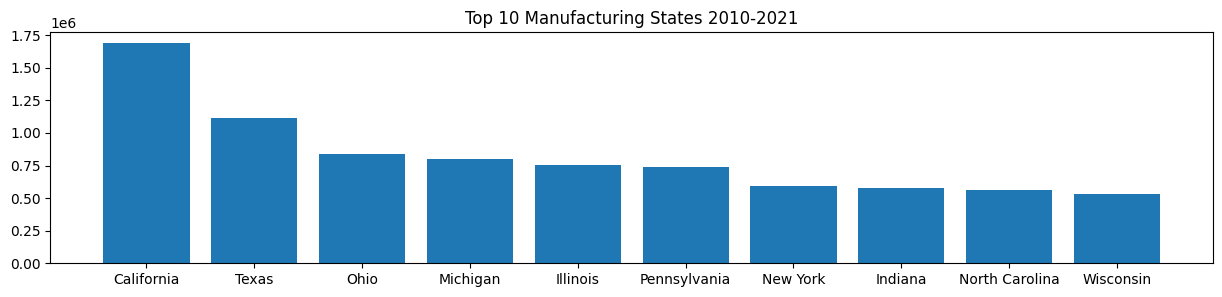

In [963]:
manufacturing_industry = industry_df[industry_df['Label (Grouping)'] == 'Manufacturing']
manufacturing_industry_by_state_total = manufacturing_industry.groupby('State')['Estimate'].mean()
top10_manufacturing_state = manufacturing_industry_by_state_total.sort_values(ascending=False)[:10]

plt.figure(figsize=(15,3))
plt.bar(top10_manufacturing_state.index,top10_manufacturing_state)
plt.title("Top 10 Manufacturing States 2010-2021")

In [964]:
state_population = industry_df[industry_df['Label (Grouping)'] == 'Civilian employed population 16 years and over'].groupby(['State'])['Estimate'].mean()
manufacturing_industry_by_state = manufacturing_industry.groupby(['State'])['Estimate'].mean()

manfacturing_population_ratio_state = manufacturing_industry_by_state/state_population
top10_manufacturing_population_ratio_state = manfacturing_population_ratio_state.sort_values(ascending=False)[:10]

In [1179]:
top10_manufacturing_population_ratio_state

State
Indiana           0.187085
Wisconsin         0.183071
Michigan          0.179677
Ohio              0.153641
Iowa              0.149131
Kentucky          0.141227
Alabama           0.141082
Arkansas          0.137386
South Carolina    0.136605
Minnesota         0.135643
Name: Estimate, dtype: float64

Text(0.5, 1.0, 'Top 10 Manufacturing to Employed Population by States 2010-2021')

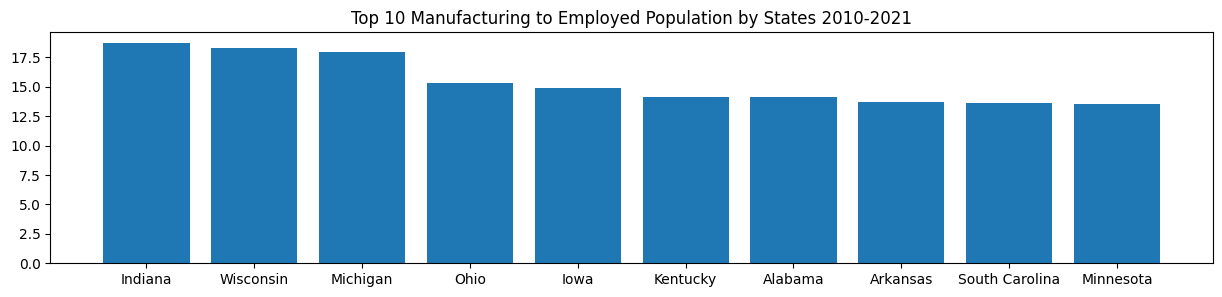

In [969]:
plt.figure(figsize=(15,3))
plt.bar(top10_manufacturing_population_ratio_state.index,top10_manufacturing_population_ratio_state*100)
plt.title("Top 10 Manufacturing to Employed Population by States 2010-2021")

In [894]:
# define regions
region_dict = {
    'Mideast':[['Delaware', 'Kentucky', 'Maryland', 'North Carolina', 'Tennessee', 'Virginia', 'West Virginia']],
    'Midwest':[['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Missouri', 'Ohio', 'Wisconsin']],
    'Mountain_Prairie':[['Colorado', 'Kansas', 'Montana', 'Nebraska', 'North Dakota', 'South Dakota', 'Utah', 'Wyoming']],
    'Northeast':[['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont']],
    'Northwest':[['Alaska', 'Idaho', 'Oregon', 'Washington', 'District of Columbia']],
    'Southeast':[['Alabama', 'Arkansas', 'Florida', 'Georgia', 'Louisiana', 'Mississippi', 'Oklahoma', 'Puerto Rico', 'South Carolina', 'Texas']],
    'Southwest':[['Arizona', 'California', 'Hawaii', 'Nevada', 'New Mexico']]
}

state_to_region = {state: region for region, states in region_dict.items() for state in states[0]}

industry_df['Region'] = industry_df['State'].map(state_to_region)

all_regions = industry_df.Region.unique()

In [898]:
region_population = industry_df[industry_df['Label (Grouping)'] == 'Civilian employed population 16 years and over'].groupby(['Region','Year'])['Estimate'].sum()

In [899]:
region_rm = industry_df[industry_df['Label (Grouping)'] == 'Agriculture, forestry, fishing and hunting, and mining'].groupby(['Region','Year'])['Estimate'].sum()

In [900]:
rm_population_ratio = region_rm/region_population

Text(0.5, 1.0, 'US Raw Material to Population Ratio per Region')

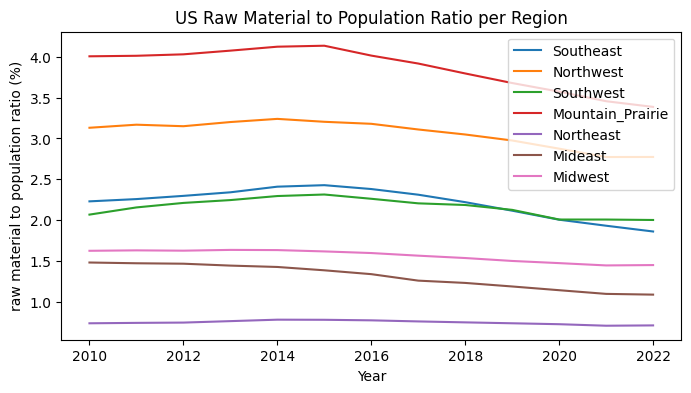

In [1182]:
plt.figure(figsize=(8, 4))
for region in all_regions:
    (rm_population_ratio*100).loc[(region),:].plot(label=region)
    plt.legend()

plt.ylabel('raw material to population ratio (%)')
plt.title('US Raw Material to Population Ratio per Region')

Text(0.5, 1.0, 'US Raw Material per Region')

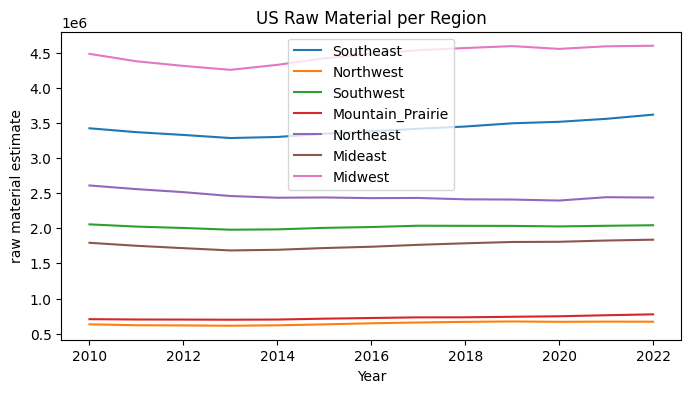

In [934]:
plt.figure(figsize=(8, 4))
for region in all_regions:
    (region_rm).loc[(region),:].plot(label=region)
    plt.legend()

plt.ylabel('raw material estimate')
plt.title('US Raw Material per Region')

In [929]:
region_manufacture = industry_df[industry_df['Label (Grouping)'] == 'Manufacturing'].groupby(['Region','Year'])['Estimate'].sum()

In [930]:
manufacture_population_ratio = region_manufacture/region_population

Text(0.5, 1.0, 'US Manufacture to Population Ratio per Region')

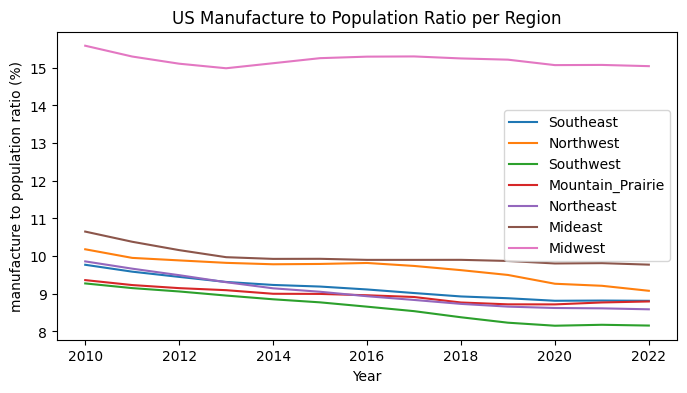

In [1181]:
plt.figure(figsize=(8, 4))
for region in all_regions:
    (manufacture_population_ratio*100).loc[(region),:].plot(label=region)
    plt.legend()

plt.ylabel('manufacture to population ratio (%)')
plt.title('US Manufacture to Population Ratio per Region')

Text(0.5, 1.0, 'US Manufacture Estimate per Region')

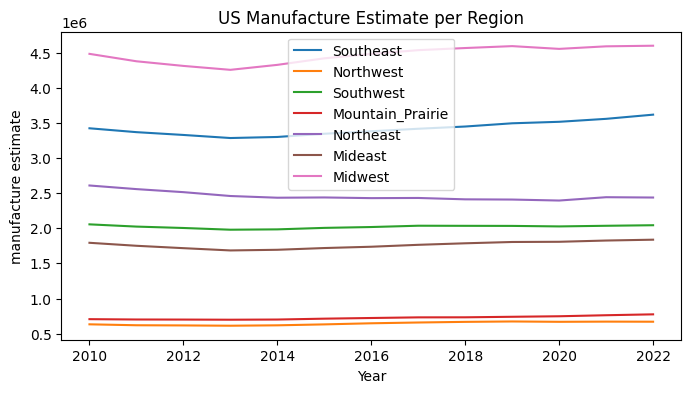

In [933]:
plt.figure(figsize=(8, 4))
for region in all_regions:
    (region_manufacture).loc[(region),:].plot(label=region)
    plt.legend()

plt.ylabel('manufacture estimate')
plt.title('US Manufacture Estimate per Region')

# Analysis over MidWest Manufacture and Raw material dip in 2013


In [1171]:
len(OLS_results)

18

In [1202]:
OLS_results['Monthly_OLS_region_redmeat_shifted-6month'].keys()

dict_keys(['result_runs', 'rsquare', 'pvalues', 'fstat', 'beta', 'beta_95CI'])

In [1208]:
all_run_result = []

for run in OLS_results.keys():
    run_result = {
        'run_name': run,
        'rsquare': OLS_results[run]['rsquare'].mean(),
        'max_rsquare': OLS_results[run]['rsquare'].max(),
        'fstat': OLS_results[run]['fstat'].mean(),
        'beta': OLS_results[run]['beta'].mean(),
        'beta_95CI': OLS_results[run]['beta_95CI'].mean()
    }
    all_run_result.append(run_result)

all_run_result_df = pd.DataFrame(all_run_result)

In [1209]:
all_run_result_df.sort_values('rsquare')

,run_name,rsquare,max_rsquare,fstat,beta,beta_95CI
2,Monthly_OLS,0.185736,0.468095,39.051199,-0.001690,-0.001690
4,Monthly_OLS_lag1,0.234260,0.446096,50.781786,-0.001041,-0.001041
14,Monthly_OLS_region_redmeat_shifted-1year,0.247773,0.309022,39.203801,-0.003150,-0.003150
3,Monthly_OLS_exclude_covid,0.332039,0.432189,59.705503,-0.001334,-0.001334
18,Monthly_OLS_poultry,0.383343,0.724036,116.968462,-0.004851,-0.004851
6,Monthly_OLS_no_covid,0.423291,0.680781,92.594124,-0.003101,-0.003101
10,Monthly_OLS_region_redmeat,0.425888,0.484609,89.287894,-0.003116,-0.003116
15,Monthly_OLS_region_redmeat_shifted3month,0.464518,0.529243,104.889407,-0.003101,-0.003101
17,Monthly_OLS_region_redmeat_shifted-3month,0.464518,0.529243,104.889407,-0.003101,-0.003101
9,Monthly_OLS_6_month_shift,0.495277,0.672377,124.461711,-0.003062,-0.003062
